In this iPython notebook, we will featurize MOR ligand binding simulation by pairwise distances between the ligand and different receptor residues. We will then perform tICA and prospectively build an MSM. 

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# changing matplotlib the default style
matplotlib.style.use('ggplot')
#matplotlib.rcParams["figure.facecolor"] = "white"
#matplotlib.rcParams["savefig.transparent"] = "True"


In [2]:
import pandas as pd


from PDB_Order_Fixer import PDB_Order_Fixer
import mdtraj as md
import os
import numpy as np
import h5py

import datetime
import glob
import copy
from functools import partial 
import operator
import time

import random 
import subprocess
from subprocess import Popen
import sys
from custom_clusterer import *
from custom_tica import *
from custom_featurizer import *
from pdb_editing import *
from analysis import *
from io_functions import *
#from topology_fixing import *
from subsampling import *
from conversions import *
from custom_msm import *
from grids import *
from docking_analysis import *

from scipy import stats
import os
from efficacy_scripts import *




Couldn't import dot_parser, loading of dot files will not be possible.
we are operating on biox3


/home/enf/software/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from sklearn.preprocessing import scale

In [5]:
from detect_intermediates import *
from interpret_tICs import *

In [6]:
from msmbuilder.utils import verbosedump, verboseload


In [7]:
from b2ar_feature_types import *
#from b2ar_feature_types import *
from get_variable_names import *
from b2ar_tica_config import *
from residue import Residue, Atom

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import scale
from random import shuffle
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [9]:

ori_feature_name = copy.deepcopy(feature_name)

In [10]:
#schemes = ["closest-heavy", "CA"]
#feature_name = "%s-CA" %ori_feature_name

In [19]:
rho = 0.01
n_components=10
rho_string = "_rho0pt01"
n_clusters = 100
n_samples = 5
lag_time=5
precision = "XP"

In [20]:
(active_ref_dir, inactive_ref_dir, simulation_ref_dir, scripts_dir,
          ligand_dir, agonist_dir, inverse_agonist_dir, biased_agonist_dir, ref_receptors_dir, whole_trajectory_pnas,
          sasa_file) = get_base_files(base)

tica_dir = get_tica_dir(base, is_sparse, lag_time, n_components, feature_name, 
                                 wolf_string, shrinkage_string, rho_string)
ori_tica_dir = copy.deepcopy(tica_dir)
features_dir = get_features_dir(base, feature_name)

landmarks_dir = get_landmarks_dir(tica_dir)
analysis_dir = get_analysis_dir(tica_dir, n_clusters, sampling_method)
gmm_dir = get_gmm_dir(tica_dir)
rf_dirdir = get_rf_dir(tica_dir)


ref_tica_dir, ref_tica_coords = get_ref_tica_dirs(tica_dir)

graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)

pnas_titles =  ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]
pnas_features_dir = analysis_dir


(clusterer_dir, msm_model_dir, macrostate_dir, features_known, model_dir, projected_features_dir,
         projection_operator_dir, ktica_fit_model_filename, ktica_projected_data_filename, nystroem_data_filename,
         mutual_information_csv, pearson_csv) = get_tica_files(base, tica_dir, n_clusters, msm_lag_time, n_macrostates)

(standardized_features_dir, feature_residues_csv, feature_residues_pkl,
          contact_csv, ref_features_dir) = get_feature_files(features_dir)

(kmeans_csv, tica_coords_csv, features_csv, active_rmsd_dir, inactive_rmsd_dir, active_pnas_dir, inactive_pnas_joined, active_pnas_joined,
        clusters_map_file, ktica_clusters_map_file, analysis_file, combined_file, docking_summary, docking_joined, docking_z_scores_csv,
        aggregate_docking, aggregate_docking_joined, docking_pnas_joined, aggregate_docking_pnas, aggregate_docking_pnas_joined, docking_multiple_ligands,
        docking_distances_file, docking_pdf, mmgbsa_docking_distances, pnas_coords, mmgbsa_dir, mmgbsa_csv, mmgbsa_pdf, aggregate_mmgbsa,
        aggregate_mmgbsa_joined, aggregate_mmgbsa_pnas_joined, mmgbsa_z_scores_csv, active_clusters_csv, intermediate_clusters_csv,
        inactive_clusters_csv, pnas_clusters_averages, tica_clusters_averages, tica_classes_csv, tica_samples_csv, subgraph_save_base,
        degree_save_base, degree_map_csv, degree_z_map_csv, aggregate_docking_pnas_degree_z_joined, tic_residue_csv, feature_coefs_csv,
        duplicated_feature_coefs_csv) = get_analysis_files(analysis_dir, n_clusters, tica_dir, tica_dir, sampling_method, n_samples, precision,
                                                           msm_lag_time)

(inactive_pnas_distances_dir, active_pnas_distances_dir, active_pnas_all_distances_dir,
          inactive_pnas_distances_new_csv, active_pnas_distances_new_csv, active_pnas_joined, active_pnas_means, pnas_coords_dir,
          pnas_coords_csv, pnas_all_coords_csv, pnas_coords_hexbin_dir, pnas_coords_co_crystallized_docking_dir,
          pnas_coords_active_colors_dir, user_defined_features_file, reaction_coordinates_trajs_file) = get_pnas_files(whole_trajectory_pnas, pnas_features_dir)

features_dir = get_features_dir(base, feature_name)



graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)
(scripts_dir, pymol_fixpdb_dir) = get_script_dir(scripts_dir)
(save_dir, reimaged_dir, mae_dir, combined_reimaged_dir, grid_dir, docking_dir) = get_docking_dirs(tica_dir, n_clusters, n_components, n_samples, sampling_method, precision)


/home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A
/home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A


In [14]:
fit_normalizer(features_dir)
fit_and_transform(features_directory = features_dir, model_dir = tica_dir, stride=5, lag_time = lag_time, n_components = n_components, sparse = sparse, wolf = wolf, rho = rho, shrinkage = shrinkage, parallel=True, traj_ext = traj_ext, normalize=True)

loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-00.dataset
loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-01.dataset
loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-02.dataset
loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-03.dataset
loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-04.dataset
loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-05.dataset
loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-06.dataset
loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-07.dataset
loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-08.dataset
loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-09.dataset
loading /home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A/A-10.dataset

In [21]:
tica_object = verboseload(projection_operator_dir)
print(tica_object.timescales_)

loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components10all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/phi_psi_chi2_allprot_tica_coords.h5"...
[ 729.62933227  289.65120394  221.13824023  197.94146302  155.82956735
  150.22308353  120.18877492  118.76379013  104.61283372   84.70096738]


Interpreting tIC 1
feature_importances_df.shape
(6, 5)
residue_importances_df.shape
(11, 2)
       feature_name   res_i   res_j  importance           feature
3  Phe108 To Gln170  Phe108  Gln170    0.278917  PHE108 to GLN170
5  Thr274 To Cys327  Thr274  Cys327   -0.216950  THR274 to CYS327
0   Asn51 To Ser319   Asn51  Ser319    0.209493   ASN51 to SER319
4   Asp79 To Tyr326   Asp79  Tyr326    0.195303   ASP79 to TYR326
2   Leu75 To Pro323   Leu75  Pro323   -0.172376   LEU75 to PRO323
1   Asn51 To Gly320   Asn51  Gly320   -0.163539   ASN51 to GLY320
Using dark_background


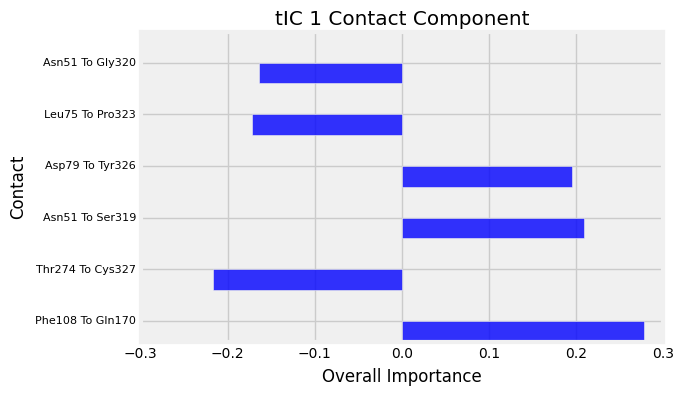

       residue  importance
Gln170  Gln170    0.278917
Phe108  Phe108    0.278917
Cys327  Cys327   -0.216950
Thr274  Thr274   -0.216950
Ser319  Ser319    0.209493
Tyr326  Tyr326    0.195303
Asp79    Asp79    0.195303
Asn51    Asn51    0.190841
Pro323  Pro323   -0.172376
Leu75    Leu75   -0.172376
Gly320  Gly320   -0.163539
Using dark_background


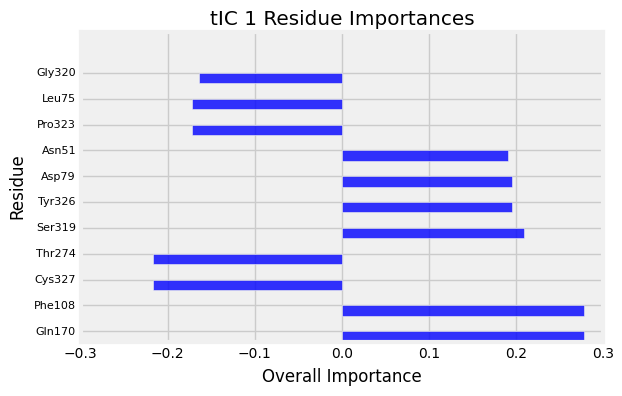

Interpreting tIC 2
feature_importances_df.shape
(7, 5)
residue_importances_df.shape
(12, 2)
       feature_name   res_i   res_j  importance           feature
6  Tyr219 To Leu272  Tyr219  Leu272    0.442840  TYR219 to LEU272
2   Asp79 To Tyr326   Asp79  Tyr326    0.325170   ASP79 to TYR326
3  Ile127 To Leu275  Ile127  Leu275    0.305118  ILE127 to LEU275
4  Tyr141 To Glu268  Tyr141  Glu268    0.272796  TYR141 to GLU268
0   Asp79 To Asn318   Asp79  Asn318    0.257021   ASP79 to ASN318
5  Tyr219 To Ala271  Tyr219  Ala271   -0.205418  TYR219 to ALA271
1   His93 To Cys190   His93  Cys190    0.193080   HIS93 to CYS190
Using dark_background


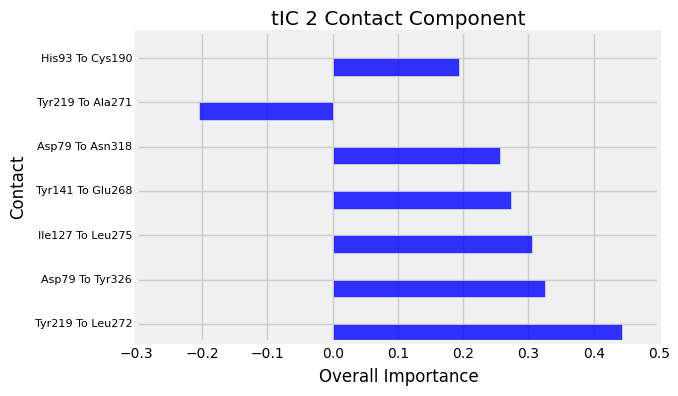

       residue  importance
Leu272  Leu272    0.442840
Tyr219  Tyr219    0.410427
Tyr326  Tyr326    0.325170
Asp79    Asp79    0.321762
Leu275  Leu275    0.305118
Ile127  Ile127    0.305118
Glu268  Glu268    0.272796
Tyr141  Tyr141    0.272796
Asn318  Asn318    0.257021
Ala271  Ala271   -0.205418
Cys190  Cys190    0.193080
His93    His93    0.193080
Using dark_background


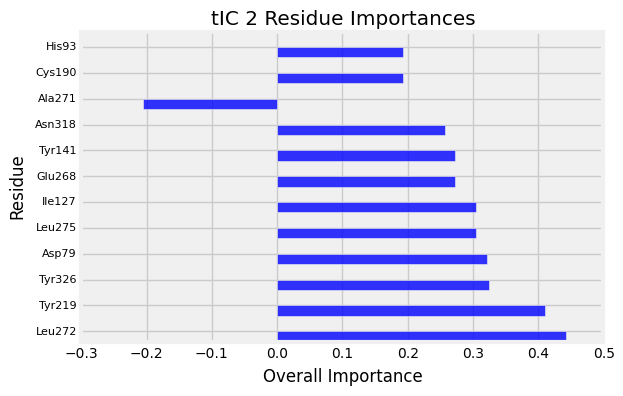

Interpreting tIC 3
feature_importances_df.shape
(13, 5)
residue_importances_df.shape
(23, 2)
        feature_name   res_i   res_j  importance           feature
2    His93 To Cys190   His93  Cys190    0.547553   HIS93 to CYS190
6   Ser111 To Gln170  Ser111  Gln170   -0.323529  SER111 to GLN170
4   Glu107 To Met171  Glu107  Met171   -0.280263  GLU107 to MET171
12  Tyr219 To Gly276  Tyr219  Gly276   -0.192910  TYR219 to GLY276
5   Thr110 To Tyr199  Thr110  Tyr199    0.184838  THR110 to TYR199
8   Tyr219 To Ile278  Tyr219  Ile278    0.151632  TYR219 to ILE278
10  Tyr141 To Glu268  Tyr141  Glu268   -0.134721  TYR141 to GLU268
7   Val117 To Phe290  Val117  Phe290    0.129033  VAL117 to PHE290
11  Tyr219 To Ala271  Tyr219  Ala271    0.106059  TYR219 to ALA271
9   His296 To Lys305  His296  Lys305    0.097088  HIS296 to LYS305
1    His93 To Trp109   His93  Trp109    0.095159   HIS93 to TRP109
3    Lys97 To Thr189   Lys97  Thr189   -0.090404   LYS97 to THR189
0     Ala92 To Trp99   Ala92   Trp99

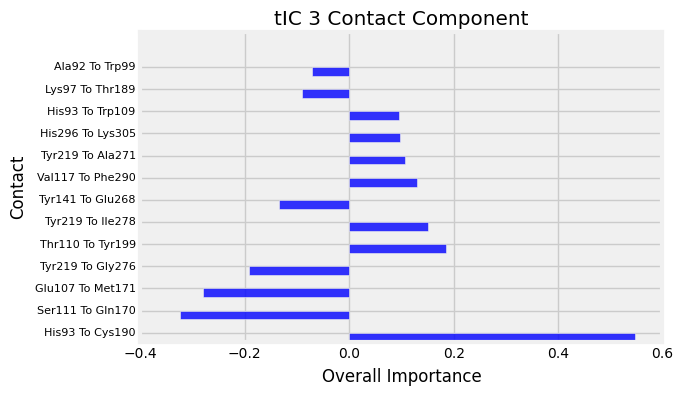

       residue  importance
Cys190  Cys190    0.547553
His93    His93    0.524933
Gln170  Gln170   -0.323529
Ser111  Ser111   -0.323529
Glu107  Glu107   -0.280263
Met171  Met171   -0.280263
Gly276  Gly276   -0.192910
Thr110  Thr110    0.184838
Tyr199  Tyr199    0.184838
Ile278  Ile278    0.151632
Tyr219  Tyr219    0.147074
Tyr141  Tyr141   -0.134721
Glu268  Glu268   -0.134721
Phe290  Phe290    0.129033
Val117  Val117    0.129033
Ala271  Ala271    0.106059
His296  His296    0.097088
Lys305  Lys305    0.097088
Trp109  Trp109    0.095159
Thr189  Thr189   -0.090404
Lys97    Lys97   -0.090404
Trp99    Trp99   -0.070866
Ala92    Ala92   -0.070866
Using dark_background


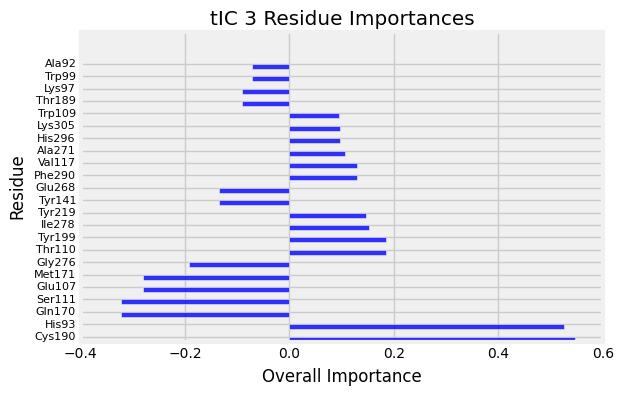

Interpreting tIC 4
feature_importances_df.shape
(4, 5)
residue_importances_df.shape
(8, 2)
       feature_name   res_i   res_j  importance           feature
3  Trp286 To Asn312  Trp286  Asn312    0.476707  TRP286 to ASN312
1  Val117 To Phe290  Val117  Phe290    0.378584  VAL117 to PHE290
2  Phe208 To Leu287  Phe208  Leu287    0.265529  PHE208 to LEU287
0  Phe108 To Gln170  Phe108  Gln170    0.159017  PHE108 to GLN170
Using dark_background


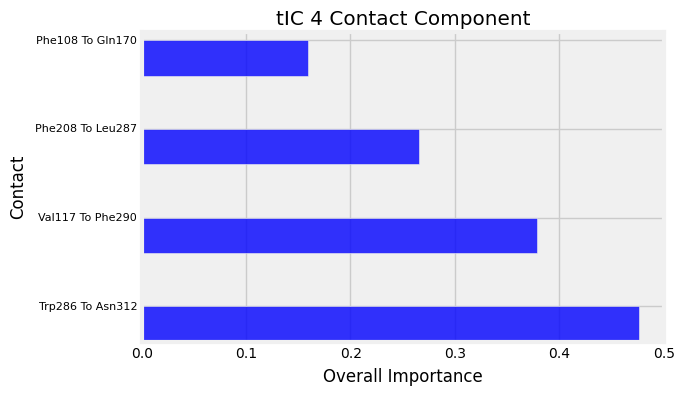

       residue  importance
Asn312  Asn312    0.476707
Trp286  Trp286    0.476707
Phe290  Phe290    0.378584
Val117  Val117    0.378584
Leu287  Leu287    0.265529
Phe208  Phe208    0.265529
Gln170  Gln170    0.159017
Phe108  Phe108    0.159017
Using dark_background


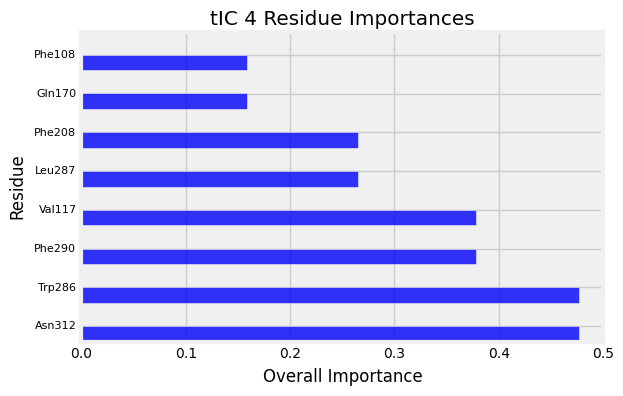

Interpreting tIC 5
feature_importances_df.shape
(11, 5)
residue_importances_df.shape
(20, 2)
        feature_name   res_i   res_j  importance           feature
3   Leu163 To Tyr199  Leu163  Tyr199    0.356542  LEU163 to TYR199
1   Thr110 To Tyr199  Thr110  Tyr199    0.290855  THR110 to TYR199
6   Ile277 To Thr281  Ile277  Thr281    0.290365  ILE277 to THR281
9    Asp79 To Phe282   Asp79  Phe282   -0.244552   ASP79 to PHE282
7   Met279 To Tyr326  Met279  Tyr326    0.227561  MET279 to TYR326
2   Val114 To Tyr199  Val114  Tyr199    0.196607  VAL114 to TYR199
8   Trp286 To Asn312  Trp286  Asn312   -0.186777  TRP286 to ASN312
4   Tyr174 To Tyr185  Tyr174  Tyr185    0.166517  TYR174 to TYR185
10  Ala271 To Arg328  Ala271  Arg328    0.154730  ALA271 to ARG328
5   Arg175 To Asn196  Arg175  Asn196    0.113715  ARG175 to ASN196
0    His93 To Cys190   His93  Cys190   -0.094378   HIS93 to CYS190
Using dark_background


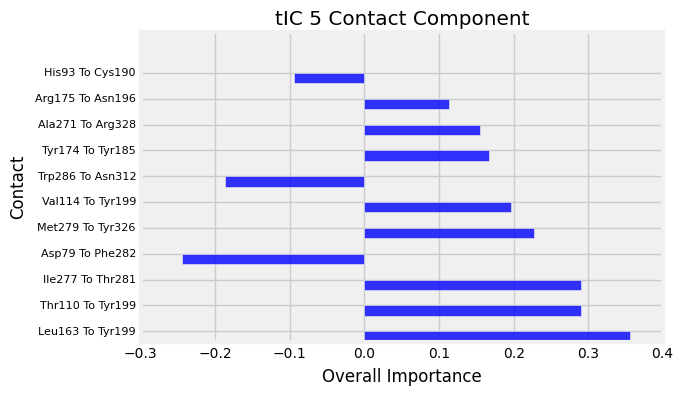

       residue  importance
Leu163  Leu163    0.356542
Tyr199  Tyr199    0.349973
Thr110  Thr110    0.290855
Ile277  Ile277    0.290365
Thr281  Thr281    0.290365
Asp79    Asp79   -0.244552
Phe282  Phe282   -0.244552
Met279  Met279    0.227561
Tyr326  Tyr326    0.227561
Val114  Val114    0.196607
Trp286  Trp286   -0.186777
Asn312  Asn312   -0.186777
Tyr174  Tyr174    0.166517
Tyr185  Tyr185    0.166517
Arg328  Arg328    0.154730
Ala271  Ala271    0.154730
Asn196  Asn196    0.113715
Arg175  Arg175    0.113715
Cys190  Cys190   -0.094378
His93    His93   -0.094378
Using dark_background


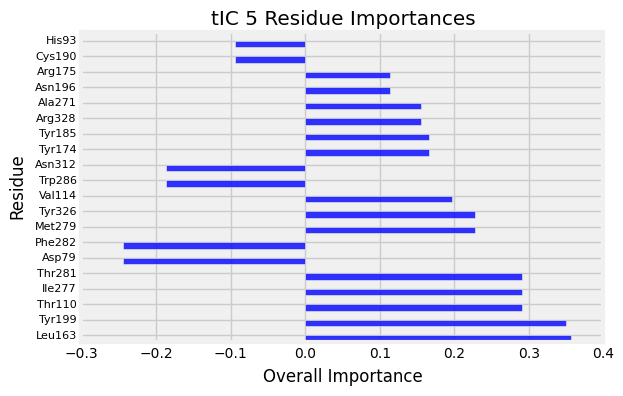

In [22]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
tic_components_dir = tica_dir
important_contact_features = interpret_tIC_components(projection_operator_dir, tic_components_dir, feature_residues_pkl, n_tica_components=5, percentile=95)

In [23]:
with open(feature_residues_pkl) as f:
    feature_names = pickle.load(f)

In [24]:
import interpret_tICs
reload(interpret_tICs)
from interpret_tICs import *
tic_subsampled_features_file = "%s/features_subsampled.pkl" % tica_dir
subsampled_features_dir = os.path.join(tica_dir, "subsampled_features")
if not os.path.exists(subsampled_features_dir): os.makedirs(subsampled_features_dir)
important_contact_features_pruned, important_contact_features_indices = find_non_zero_features(important_contact_features[0], feature_names)
#subsample_features(features_dir, important_contact_features_indices, important_contact_features_pruned, tic_subsampled_features_file)

In [25]:
tica_coords = verboseload(projected_features_dir)
pnas_coords = verboseload(pnas_coords_dir)
for pnas_coord in pnas_coords: pnas_coord[:,0]*=7.14
tica_names = ["tIC.%d" %i for i in range(1,n_components+1)]
pnas_names = ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]

loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components10all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/phi_psi_chi2_allprot_projected.h5"...
loading "/home/enf/b2ar_analysis/all_pnas_features/pnas_coords.h5"...


In [26]:
import plots
reload(plots)
from plots import *
#plot_histograms(projected_features_dir, analysis_dir, "tICA histogram", titles=["tIC.%d" %i for i in range(1,n_components+1)])

In [27]:
lag_time = 25
msm_model_dir = "%s/msm_lag_time%d.h5" % (tica_dir, lag_time)
build_msm(clusterer_dir, lag_time=lag_time, msm_model_dir=msm_model_dir)
msm_object = verboseload(msm_model_dir)
prior_counts = 0.

loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components10all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_100clusters.h5"...
fitting msm to trajectories with 100 clusters and lag_time 25
MSM contains 1 strongly connected component above weight=0.04. Component 0 selected, with population 100.000000%
MarkovStateModel(ergodic_cutoff='on', lag_time=25, n_timescales=None,
         prior_counts=0.0, reversible_type='mle', sliding_window=True,
         verbose=True)
Saving "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components10all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/msm_lag_time25.h5"... (<class 'msmbuilder.msm.msm.MarkovStateModel'>)
fitted msm to trajectories with 100 states
loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components10all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/msm_lag_time25.h5"...


In [28]:

#compute_aggregate_scores(docking_multiple_ligands, inverse_agonists = inverse_ligands, summary = aggregate_docking, z_scores_csv = docking_z_scores_csv)
#aggregate_docking_joined_map = convert_csv_to_joined_map(aggregate_docking, aggregate_docking_joined)[0]
#aggregate_docking_means = calc_mean(aggregate_docking_joined_map)
#write_map_to_csv(aggregate_docking_joined, aggregate_docking_means, ["cluster", "mean_aggregate_docking_z_score"])
#r['do.analysis'](tica_dir, analysis_dir, pnas_coords_csv, tica_coords_csv, features_dir, docking_multiple_ligands)
#tics_vs_docking_file = "%s/tICA_vs_docking_carazolol.pdf" % analysis_dir
#plot_tICs_vs_docking(docking_multiple_ligands, tica_coords_csv, tics_vs_docking_file, chosen_ligand="s-carazolol")


In [29]:
projection_operator_dir

'/home/enf/b2ar_analysis/sparse-tICA_t5_n_components10all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/phi_psi_chi2_allprot_tica_coords.h5'

Interpreting tIC 1
feature_importances_df.shape
(5, 5)
residue_importances_df.shape
(10, 2)
       feature_name   res_i   res_j  importance           feature
0   Ile72 To Thr123   Ile72  Thr123   -1.180972   ILE72 to THR123
1   Leu75 To Pro323   Leu75  Pro323    1.069516   LEU75 to PRO323
3  Phe332 To Ala335  Phe332  Ala335    0.763328  PHE332 to ALA335
4  Ile135 To Gln224  Ile135  Gln224   -0.662528  ILE135 to GLN224
2  Phe104 To Glu188  Phe104  Glu188    0.654189  PHE104 to GLU188
Using dark_background


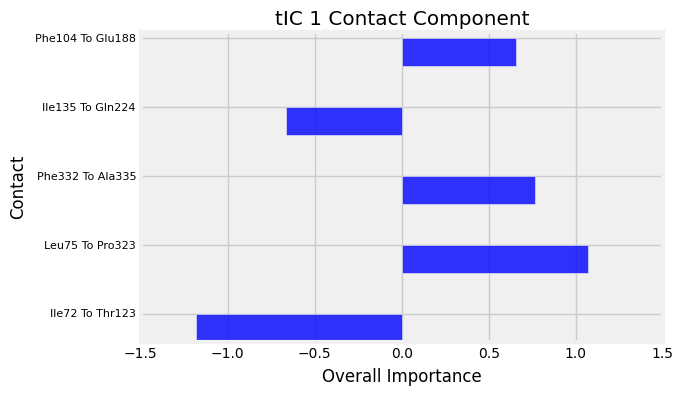

       residue  importance
Thr123  Thr123   -1.180972
Ile72    Ile72   -1.180972
Pro323  Pro323    1.069516
Leu75    Leu75    1.069516
Ala335  Ala335    0.763328
Phe332  Phe332    0.763328
Gln224  Gln224   -0.662528
Ile135  Ile135   -0.662528
Glu188  Glu188    0.654189
Phe104  Phe104    0.654189
Using dark_background


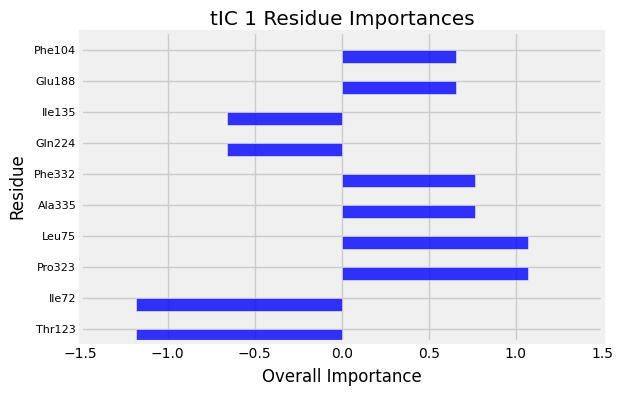

Interpreting tIC 2
feature_importances_df.shape
(10, 5)
residue_importances_df.shape
(17, 2)
       feature_name   res_i   res_j  importance           feature
7  Ala128 To Val216  Ala128  Val216   -1.457099  ALA128 to VAL216
0   Leu75 To Pro323   Leu75  Pro323    1.288608   LEU75 to PRO323
8  Ala128 To Met279  Ala128  Met279    1.076218  ALA128 to MET279
4  Phe332 To Ala335  Phe332  Ala335    1.027000  PHE332 to ALA335
1    Phe89 To Trp99   Phe89   Trp99    0.888000    PHE89 to TRP99
9  Val129 To Val222  Val129  Val222    0.848733  VAL129 to VAL222
5    Phe61 To Thr66   Phe61   Thr66    0.705307    PHE61 to THR66
2  Val213 To Val216  Val213  Val216   -0.637757  VAL213 to VAL216
3  Phe332 To Ile334  Phe332  Ile334    0.581121  PHE332 to ILE334
6   His93 To Lys305   His93  Lys305    0.417727   HIS93 to LYS305
Using dark_background


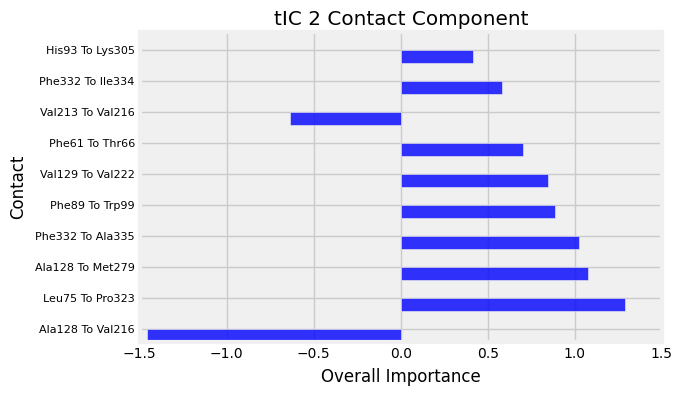

       residue  importance
Leu75    Leu75    1.288608
Pro323  Pro323    1.288608
Met279  Met279    1.076218
Ala335  Ala335    1.027000
Phe332  Phe332    1.004706
Ala128  Ala128    0.949553
Phe89    Phe89    0.888000
Trp99    Trp99    0.888000
Val129  Val129    0.848733
Val222  Val222    0.848733
Phe61    Phe61    0.705307
Thr66    Thr66    0.705307
Val216  Val216   -0.678724
Val213  Val213   -0.637757
Ile334  Ile334    0.581121
His93    His93    0.417727
Lys305  Lys305    0.417727
Using dark_background


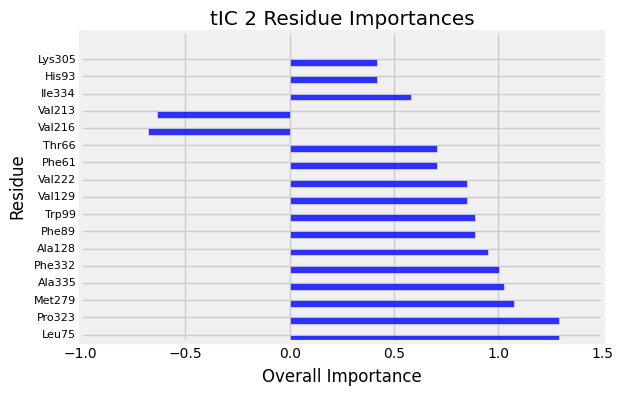

Interpreting tIC 3
feature_importances_df.shape
(7, 5)
residue_importances_df.shape
(14, 2)
       feature_name   res_i   res_j  importance           feature
6  Gly280 To Thr283  Gly280  Thr283    2.363325  GLY280 to THR283
2  Val114 To Thr164  Val114  Thr164    1.655296  VAL114 to THR164
5  Ser203 To Asn293  Ser203  Asn293    1.251909  SER203 to ASN293
4  Ala198 To Ile201  Ala198  Ile201    0.924236  ALA198 to ILE201
3  Tyr185 To Thr195  Tyr185  Thr195    0.679447  TYR185 to THR195
0    Phe89 To Trp99   Phe89   Trp99   -0.438659    PHE89 to TRP99
1  Phe104 To Glu188  Phe104  Glu188    0.405791  PHE104 to GLU188
Using dark_background


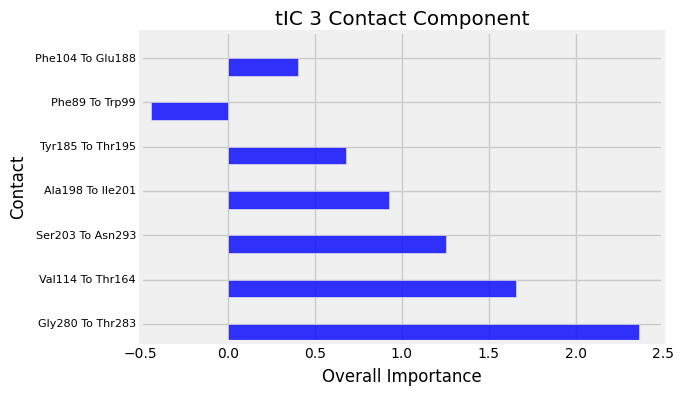

       residue  importance
Thr283  Thr283    2.363325
Gly280  Gly280    2.363325
Thr164  Thr164    1.655296
Val114  Val114    1.655296
Asn293  Asn293    1.251909
Ser203  Ser203    1.251909
Ile201  Ile201    0.924236
Ala198  Ala198    0.924236
Thr195  Thr195    0.679447
Tyr185  Tyr185    0.679447
Trp99    Trp99   -0.438659
Phe89    Phe89   -0.438659
Glu188  Glu188    0.405791
Phe104  Phe104    0.405791
Using dark_background


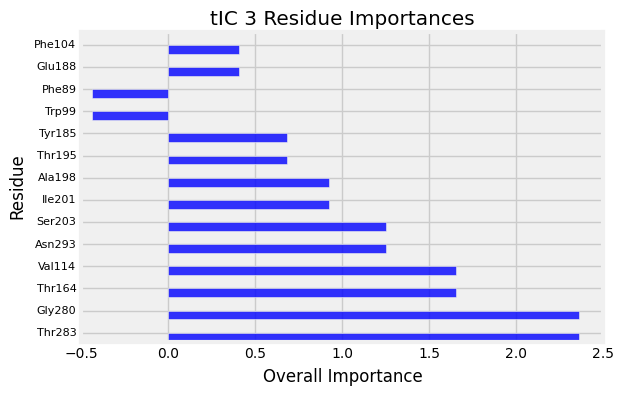

Interpreting tIC 4
feature_importances_df.shape
(12, 5)
residue_importances_df.shape
(24, 2)
        feature_name   res_i   res_j  importance           feature
2     Phe89 To Trp99   Phe89   Trp99    2.068668    PHE89 to TRP99
6   Glu107 To Thr110  Glu107  Thr110    1.394653  GLU107 to THR110
0    Leu75 To Pro323   Leu75  Pro323    1.000663   LEU75 to PRO323
8   Leu167 To Tyr199  Leu167  Tyr199   -0.951380  LEU167 to TYR199
1    Val87 To Tyr316   Val87  Tyr316   -0.933353   VAL87 to TYR316
7   Met156 To Ser161  Met156  Ser161    0.914508  MET156 to SER161
5   Phe104 To Glu188  Phe104  Glu188   -0.818826  PHE104 to GLU188
9   Ala198 To Ile201  Ala198  Ile201    0.766072  ALA198 to ILE201
11  Asp130 To Gln142  Asp130  Gln142   -0.755161  ASP130 to GLN142
3    Ala91 To Trp109   Ala91  Trp109   -0.731690   ALA91 to TRP109
4   Asn103 To Tyr185  Asn103  Tyr185   -0.643264  ASN103 to TYR185
10   His93 To Lys305   His93  Lys305   -0.425386   HIS93 to LYS305
Using dark_background


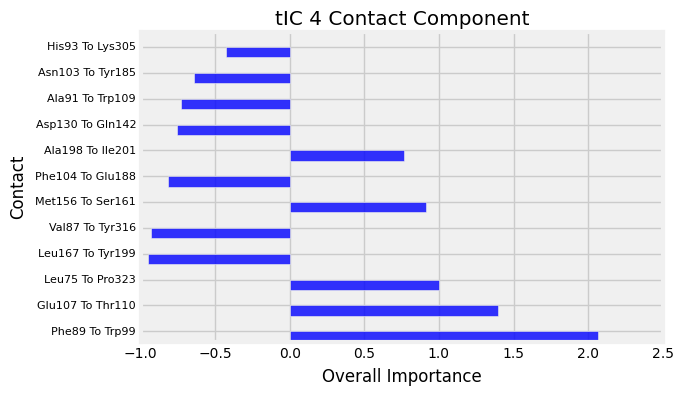

       residue  importance
Trp99    Trp99    2.068668
Phe89    Phe89    2.068668
Glu107  Glu107    1.394653
Thr110  Thr110    1.394653
Pro323  Pro323    1.000663
Leu75    Leu75    1.000663
Leu167  Leu167   -0.951380
Tyr199  Tyr199   -0.951380
Val87    Val87   -0.933353
Tyr316  Tyr316   -0.933353
Met156  Met156    0.914508
Ser161  Ser161    0.914508
Glu188  Glu188   -0.818826
Phe104  Phe104   -0.818826
Ala198  Ala198    0.766072
Ile201  Ile201    0.766072
Asp130  Asp130   -0.755161
Gln142  Gln142   -0.755161
Ala91    Ala91   -0.731690
Trp109  Trp109   -0.731690
Tyr185  Tyr185   -0.643264
Asn103  Asn103   -0.643264
Lys305  Lys305   -0.425386
His93    His93   -0.425386
Using dark_background


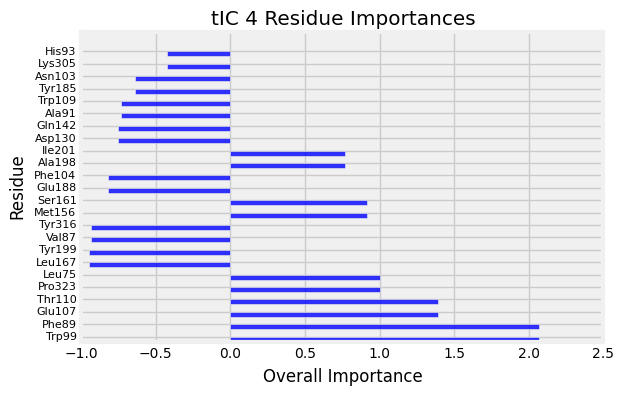

Interpreting tIC 5
feature_importances_df.shape
(17, 5)
residue_importances_df.shape
(30, 2)
        feature_name   res_i   res_j  importance           feature
9   Tyr174 To Thr195  Tyr174  Thr195    1.866706  TYR174 to THR195
10  Val213 To Val216  Val213  Val216   -1.358702  VAL213 to VAL216
0     Phe89 To Trp99   Phe89   Trp99   -1.345337    PHE89 to TRP99
5   Met156 To Ser161  Met156  Ser161    1.216413  MET156 to SER161
8   Ile169 To Tyr199  Ile169  Tyr199    1.134999  ILE169 to TYR199
7   Ile169 To Tyr174  Ile169  Tyr174    1.069908  ILE169 to TYR174
6   Leu167 To Gln170  Leu167  Gln170    1.067885  LEU167 to GLN170
11  Gly280 To Thr283  Gly280  Thr283   -1.030235  GLY280 to THR283
2   Glu107 To Thr110  Glu107  Thr110    0.959543  GLU107 to THR110
3   Trp109 To Tyr316  Trp109  Tyr316   -0.886761  TRP109 to TYR316
14   Val48 To Ser319   Val48  Ser319   -0.851106   VAL48 to SER319
13  Phe332 To Ile334  Phe332  Ile334   -0.765788  PHE332 to ILE334
16  Ile135 To His269  Ile135  His269

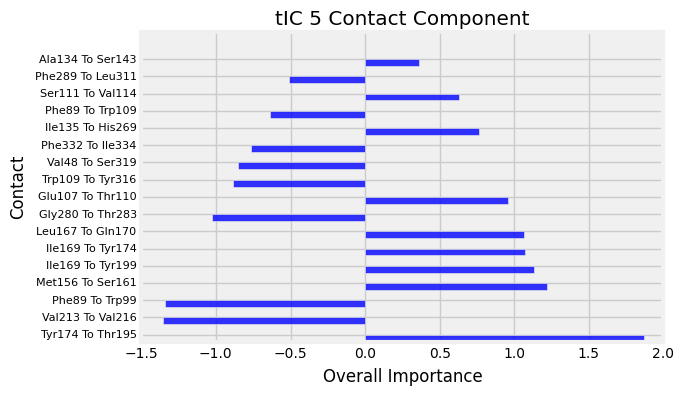

       residue  importance
Thr195  Thr195    1.866706
Tyr174  Tyr174    1.826866
Val216  Val216   -1.358702
Val213  Val213   -1.358702
Trp99    Trp99   -1.345337
Ser161  Ser161    1.216413
Met156  Met156    1.216413
Tyr199  Tyr199    1.134999
Ile169  Ile169    1.131745
Leu167  Leu167    1.067885
Gln170  Gln170    1.067885
Thr283  Thr283   -1.030235
Gly280  Gly280   -1.030235
Thr110  Thr110    0.959543
Glu107  Glu107    0.959543
Tyr316  Tyr316   -0.886761
Val48    Val48   -0.851106
Ser319  Ser319   -0.851106
Phe332  Phe332   -0.765788
Ile334  Ile334   -0.765788
His269  His269    0.764262
Ile135  Ile135    0.764262
Phe89    Phe89   -0.676184
Trp109  Trp109   -0.653255
Val114  Val114    0.628804
Ser111  Ser111    0.628804
Phe289  Phe289   -0.510120
Leu311  Leu311   -0.510120
Ala134  Ala134    0.362678
Ser143  Ser143    0.362678
Using dark_background


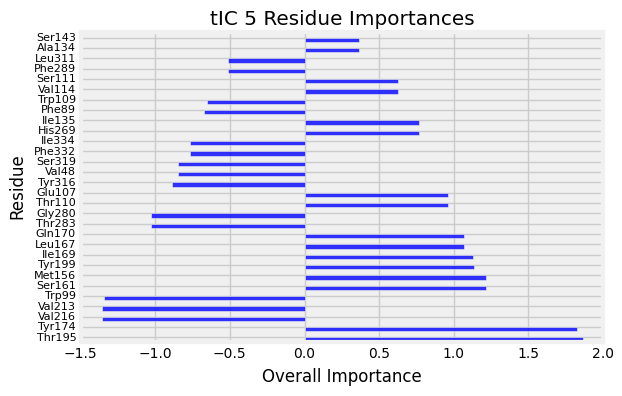

Interpreting tIC 6
feature_importances_df.shape
(13, 5)
residue_importances_df.shape
(24, 2)
        feature_name   res_i   res_j  importance           feature
3     Phe89 To Trp99   Phe89   Trp99    2.171456    PHE89 to TRP99
10  Tyr326 To Cys327  Tyr326  Cys327   -1.294144  TYR326 to CYS327
11  His178 To Asp300  His178  Asp300   -1.268916  HIS178 to ASP300
0    Asn51 To Ser319   Asn51  Ser319    1.086656   ASN51 to SER319
4    Ala91 To Trp109   Ala91  Trp109   -1.014983   ALA91 to TRP109
2     Ala76 To Ala78   Ala76   Ala78    0.962534    ALA76 to ALA78
7   Phe104 To Glu188  Phe104  Glu188    0.836899  PHE104 to GLU188
5   Asn103 To Ala186  Asn103  Ala186    0.782822  ASN103 to ALA186
9   Phe289 To Leu311  Phe289  Leu311    0.753307  PHE289 to LEU311
12  Ala181 To Thr195  Ala181  Thr195   -0.702196  ALA181 to THR195
6   Asn103 To Glu188  Asn103  Glu188   -0.659318  ASN103 to GLU188
1    Ile72 To Thr123   Ile72  Thr123    0.584199   ILE72 to THR123
8   Val213 To Val218  Val213  Val218

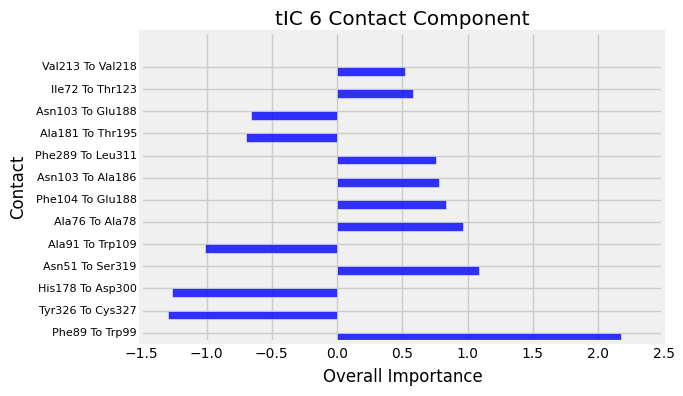

       residue  importance
Phe89    Phe89    2.171456
Trp99    Trp99    2.171456
Tyr326  Tyr326   -1.294144
Cys327  Cys327   -1.294144
Asp300  Asp300   -1.268916
His178  His178   -1.268916
Asn51    Asn51    1.086656
Ser319  Ser319    1.086656
Ala91    Ala91   -1.014983
Trp109  Trp109   -1.014983
Ala76    Ala76    0.962534
Ala78    Ala78    0.962534
Phe104  Phe104    0.836899
Ala186  Ala186    0.782822
Glu188  Glu188    0.762089
Phe289  Phe289    0.753307
Leu311  Leu311    0.753307
Asn103  Asn103    0.710715
Ala181  Ala181   -0.702196
Thr195  Thr195   -0.702196
Thr123  Thr123    0.584199
Ile72    Ile72    0.584199
Val213  Val213    0.518289
Val218  Val218    0.518289
Using dark_background


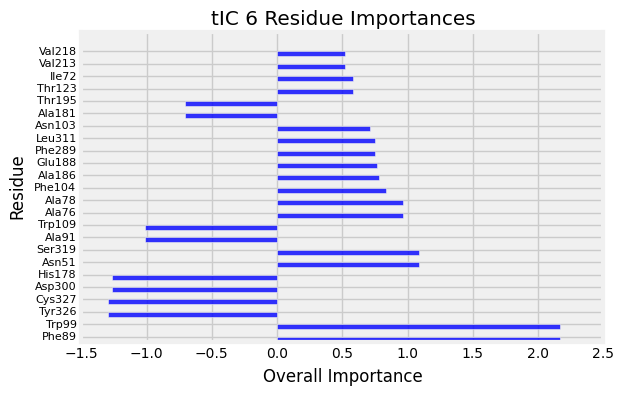

Interpreting tIC 7
feature_importances_df.shape
(19, 5)
residue_importances_df.shape
(29, 2)
        feature_name   res_i   res_j  importance           feature
13  Arg175 To Ala176  Arg175  Ala176    4.251978  ARG175 to ALA176
14  Arg175 To Thr177  Arg175  Thr177   -3.520309  ARG175 to THR177
11  Trp173 To Arg175  Trp173  Arg175    2.597660  TRP173 to ARG175
12  Tyr174 To Thr195  Tyr174  Thr195    2.512260  TYR174 to THR195
2     Ala76 To Ala78   Ala76   Ala78    2.020504    ALA76 to ALA78
7   Ile169 To Tyr199  Ile169  Tyr199    1.995631  ILE169 to TYR199
8   Gln170 To Tyr174  Gln170  Tyr174    1.943937  GLN170 to TYR174
10  His172 To Arg175  His172  Arg175   -1.898820  HIS172 to ARG175
16  Asp331 To Ile334  Asp331  Ile334   -1.624373  ASP331 to ILE334
17  Phe332 To Ala335  Phe332  Ala335    1.566055  PHE332 to ALA335
4   Glu107 To Thr110  Glu107  Thr110   -1.464964  GLU107 to THR110
0     Leu75 To Asp79   Leu75   Asp79   -1.168642    LEU75 to ASP79
5   Met156 To Ser161  Met156  Ser161

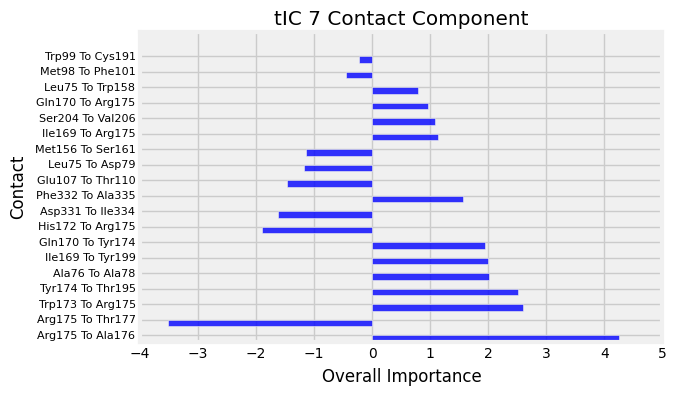

       residue  importance
Ala176  Ala176    4.251978
Arg175  Arg175    3.838398
Thr177  Thr177   -3.520309
Trp173  Trp173    2.597660
Thr195  Thr195    2.512260
Tyr174  Tyr174    2.483844
Ala78    Ala78    2.020504
Ala76    Ala76    2.020504
Tyr199  Tyr199    1.995631
Ile169  Ile169    1.952395
His172  His172   -1.898820
Gln170  Gln170    1.894433
Ile334  Ile334   -1.624373
Asp331  Asp331   -1.624373
Phe332  Phe332    1.566055
Ala335  Ala335    1.566055
Thr110  Thr110   -1.464964
Glu107  Glu107   -1.464964
Asp79    Asp79   -1.168642
Ser161  Ser161   -1.140607
Met156  Met156   -1.140607
Val206  Val206    1.090576
Ser204  Ser204    1.090576
Trp158  Trp158    0.793085
Leu75    Leu75    0.694999
Met98    Met98   -0.452538
Phe101  Phe101   -0.452538
Cys191  Cys191   -0.224606
Trp99    Trp99   -0.224606
Using dark_background


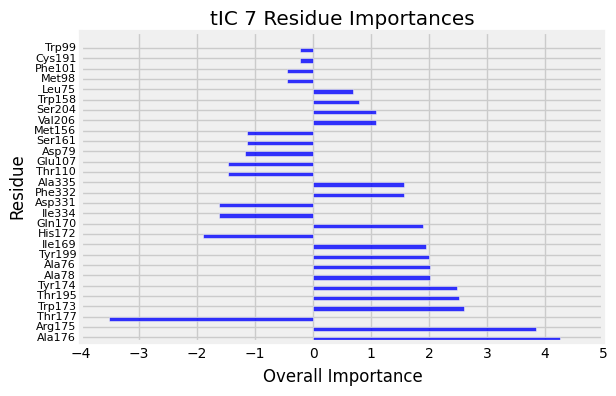

Interpreting tIC 8
feature_importances_df.shape
(13, 5)
residue_importances_df.shape
(22, 2)
        feature_name   res_i   res_j  importance           feature
5   Phe133 To Arg221  Phe133  Arg221    6.547490  PHE133 to ARG221
9   Lys270 To Thr274  Lys270  Thr274   -5.607832  LYS270 to THR274
2   Tyr132 To Phe217  Tyr132  Phe217    4.469084  TYR132 to PHE217
12   Val87 To Ser319   Val87  Ser319   -4.365522   VAL87 to SER319
4   Phe133 To Ala134  Phe133  Ala134    4.130300  PHE133 to ALA134
11   Ala85 To Cys116   Ala85  Cys116   -3.809418   ALA85 to CYS116
3   Tyr132 To Glu225  Tyr132  Glu225    3.188799  TYR132 to GLU225
8   Lys267 To Lys270  Lys267  Lys270    2.111741  LYS267 to LYS270
0   Cys125 To Leu212  Cys125  Leu212    2.007287  CYS125 to LEU212
7   Tyr174 To Thr195  Tyr174  Thr195   -0.957343  TYR174 to THR195
6   Met156 To Ser161  Met156  Ser161   -0.650240  MET156 to SER161
10  Met279 To Thr281  Met279  Thr281    0.626873  MET279 to THR281
1   Ile127 To Tyr132  Ile127  Tyr132

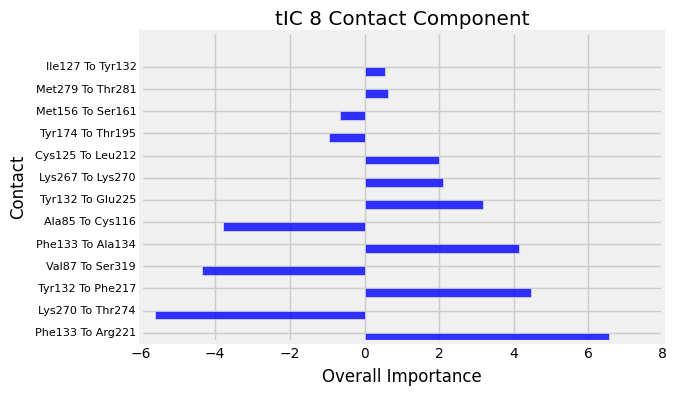

       residue  importance
Arg221  Arg221    6.547490
Phe133  Phe133    6.426631
Thr274  Thr274   -5.607832
Phe217  Phe217    4.469084
Val87    Val87   -4.365522
Ser319  Ser319   -4.365522
Tyr132  Tyr132    4.341056
Ala134  Ala134    4.130300
Cys116  Cys116   -3.809418
Ala85    Ala85   -3.809418
Glu225  Glu225    3.188799
Lys267  Lys267    2.111741
Cys125  Cys125    2.007287
Leu212  Leu212    2.007287
Lys270  Lys270    1.725762
Tyr174  Tyr174   -0.957343
Thr195  Thr195   -0.957343
Met156  Met156   -0.650240
Ser161  Ser161   -0.650240
Thr281  Thr281    0.626873
Met279  Met279    0.626873
Ile127  Ile127    0.544145
Using dark_background


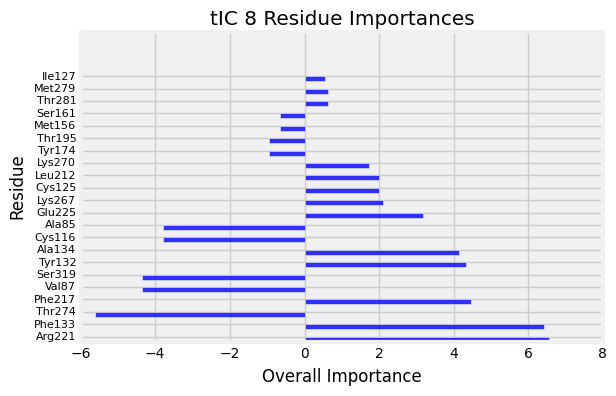

Interpreting tIC 9
feature_importances_df.shape
(18, 5)
residue_importances_df.shape
(28, 2)
        feature_name   res_i   res_j  importance           feature
5   Ser137 To Glu225  Ser137  Glu225    3.516679  SER137 to GLU225
7   Pro138 To Gln142  Pro138  Gln142    3.173817  PRO138 to GLN142
8   Leu163 To Leu167  Leu163  Leu167    2.470449  LEU163 to LEU167
1     Thr66 To Thr73   Thr66   Thr73    2.333143    THR66 to THR73
6   Pro138 To Phe139  Pro138  Phe139    2.267625  PRO138 to PHE139
3   Phe133 To Arg221  Phe133  Arg221   -2.131505  PHE133 to ARG221
9   Leu163 To Pro168  Leu163  Pro168   -2.031260  LEU163 to PRO168
4   Thr136 To Arg221  Thr136  Arg221   -1.848268  THR136 to ARG221
13  Pro168 To His172  Pro168  His172    1.558619  PRO168 to HIS172
10  Thr164 To Leu167  Thr164  Leu167    1.556199  THR164 to LEU167
12  Pro168 To Met171  Pro168  Met171   -1.425854  PRO168 to MET171
14  Pro168 To Arg175  Pro168  Arg175   -0.955627  PRO168 to ARG175
15  Tyr174 To Thr195  Tyr174  Thr195

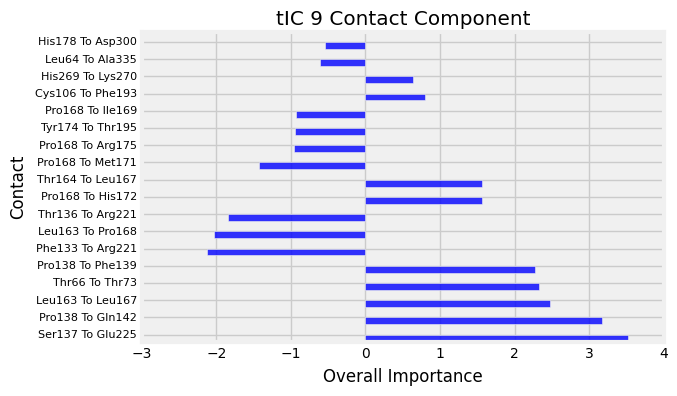

       residue  importance
Ser137  Ser137    3.516679
Glu225  Glu225    3.516679
Gln142  Gln142    3.173817
Pro138  Pro138    3.128508
Leu167  Leu167    2.424737
Thr66    Thr66    2.333143
Thr73    Thr73    2.333143
Phe139  Phe139    2.267625
Leu163  Leu163    2.245364
Phe133  Phe133   -2.131505
Arg221  Arg221   -1.862430
Thr136  Thr136   -1.848268
His172  His172    1.558619
Thr164  Thr164    1.556199
Met171  Met171   -1.425854
Pro168  Pro168    1.061095
Arg175  Arg175   -0.955627
Tyr174  Tyr174   -0.947528
Thr195  Thr195   -0.947528
Ile169  Ile169   -0.929003
Cys106  Cys106    0.797698
Phe193  Phe193    0.797698
His269  His269    0.631766
Lys270  Lys270    0.631766
Ala335  Ala335   -0.615229
Leu64    Leu64   -0.615229
His178  His178   -0.538523
Asp300  Asp300   -0.538523
Using dark_background


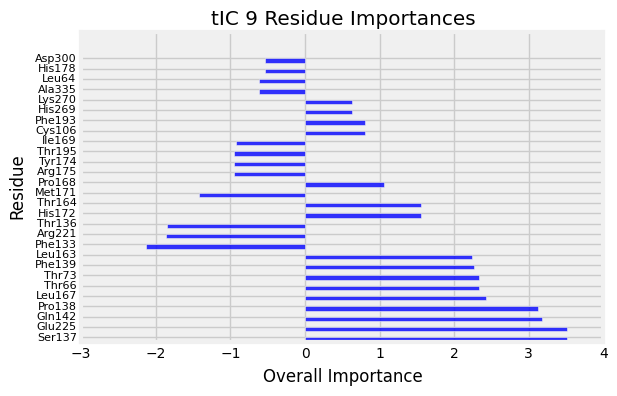

Interpreting tIC 10
feature_importances_df.shape
(25, 5)
residue_importances_df.shape
(37, 2)
        feature_name   res_i   res_j  importance           feature
13  Lys270 To Thr274  Lys270  Thr274    3.794095  LYS270 to THR274
7   Phe133 To Arg221  Phe133  Arg221    2.389175  PHE133 to ARG221
12  Glu268 To Ala271  Glu268  Ala271   -2.087100  GLU268 to ALA271
24  Tyr141 To Ala226  Tyr141  Ala226    1.823428  TYR141 to ALA226
18   Val87 To Ser319   Val87  Ser319   -1.777070   VAL87 to SER319
10  Lys267 To Lys270  Lys267  Lys270   -1.745172  LYS267 to LYS270
6   Phe133 To Ile135  Phe133  Ile135    1.502533  PHE133 to ILE135
14  Ala271 To Leu272  Ala271  Leu272   -1.435527  ALA271 to LEU272
11  Glu268 To Lys270  Glu268  Lys270   -1.316713  GLU268 to LYS270
9   Lys267 To His269  Lys267  His269   -1.205864  LYS267 to HIS269
19  Val129 To Met279  Val129  Met279   -1.193216  VAL129 to MET279
4   Cys125 To Leu212  Cys125  Leu212    1.000602  CYS125 to LEU212
17   Thr68 To Ser143   Thr68  Ser14

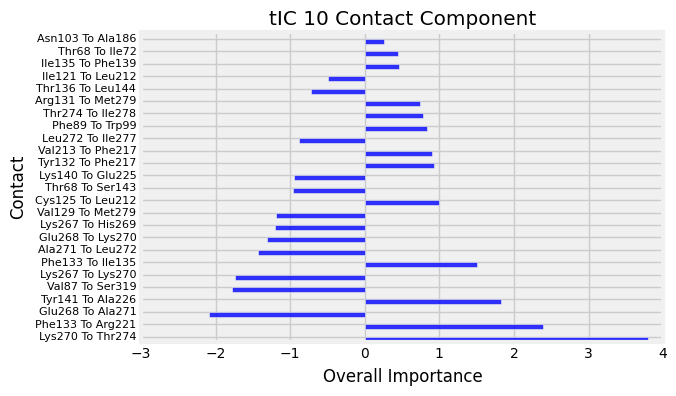

       residue  importance
Thr274  Thr274    3.643574
Lys270  Lys270    3.283014
Arg221  Arg221    2.389175
Phe133  Phe133    2.344842
Ala226  Ala226    1.823428
Tyr141  Tyr141    1.823428
Ser319  Ser319   -1.777070
Val87    Val87   -1.777070
Ala271  Ala271   -1.468105
Ile135  Ile135    1.450242
Glu268  Glu268   -1.355232
Lys267  Lys267   -1.232829
His269  His269   -1.205864
Val129  Val129   -1.193216
Cys125  Cys125    1.000602
Ser143  Ser143   -0.966338
Lys140  Lys140   -0.945357
Glu225  Glu225   -0.945357
Tyr132  Tyr132    0.927413
Leu212  Leu212    0.926039
Phe217  Phe217    0.925804
Leu272  Leu272   -0.904932
Val213  Val213    0.895219
Ile277  Ile277   -0.877006
Phe89    Phe89    0.827264
Trp99    Trp99    0.827264
Ile278  Ile278    0.783670
Arg131  Arg131    0.739430
Thr136  Thr136   -0.719756
Leu144  Leu144   -0.719756
Met279  Met279    0.642798
Ile121  Ile121   -0.490657
Phe139  Phe139    0.456708
Ile72    Ile72    0.441253
Thr68    Thr68    0.370873
Asn103  Asn103    0.262933
A

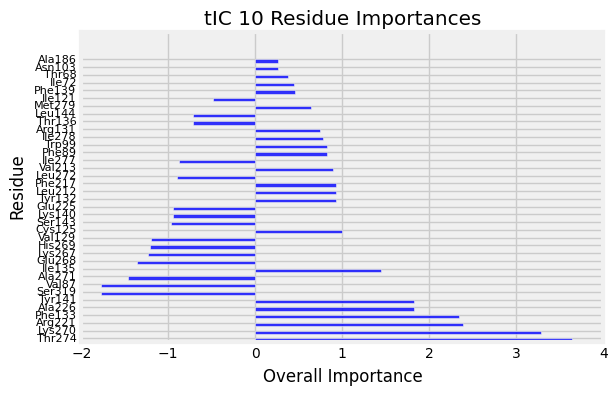

In [30]:
alt_pp_tica_dir = "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01"
alt_projection_operator_dir = "%s/phi_psi_chi2_allprot_tica_coords.h5" %alt_pp_tica_dir
tic_subsampled_features_file = "%s/features_subsampled.pkl" % alt_pp_tica_dir
with open(feature_residues_pkl, "rb") as f:
    feature_names = pickle.load(f)

alt_important_contact_features = interpret_tIC_components(alt_projection_operator_dir, alt_pp_tica_dir, feature_residues_pkl, n_tica_components=10, percentile=95)

subsampled_features_dir = os.path.join(alt_pp_tica_dir, "subsampled_features")
if not os.path.exists(subsampled_features_dir): os.makedirs(subsampled_features_dir)
alt_important_contact_features_pruned, alt_important_contact_features_indices = find_non_zero_features(alt_important_contact_features[0], feature_names)
if not os.path.exists(tic_subsampled_features_file):
    subsample_features(features_dir, alt_important_contact_features_indices, alt_important_contact_features_pruned, tic_subsampled_features_file)

In [32]:
import b2ar_feature_types
reload(b2ar_feature_types)
from b2ar_feature_types import *

top_features = load_file(tic_subsampled_features_file)
top_features = [t*10. for t in top_features]

user_defined_coords = verboseload(user_defined_features_file)
user_defined_names = sorted(feature_name_residues_dict.keys())
user_defined_dfs = [pd.DataFrame(t, columns=user_defined_names) for t in user_defined_coords]

tica_dfs = [pd.DataFrame(t, columns=["tIC.%d" %i for i in range(1,n_components+1)]) for t in tica_coords]

all_feature_dfs = [pd.concat([top_features[i], user_defined_dfs[i], tica_dfs[i]], axis=1) for i in range(0, len(top_features))]


loading /home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/features_subsampled.pkl
loading "/home/enf/b2ar_analysis/all_pnas_features/user_defined_features.h5"...


In [33]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *
all_features_onehot, names_onehot = multi_onehot_trajectories([t.values for t in all_feature_dfs], all_feature_dfs[0].columns.values.tolist())
all_features_onehot = [pd.DataFrame(t, columns=names_onehot) for t in all_features_onehot]

we are operating on biox3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121


In [34]:
[n for n in top_features[0].columns.values.tolist() if "TYR326" in n]

['TYR326 to CYS327']

In [35]:
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *

clusterer, cluster_averages, active_clusters, inactive_clusters, biased_ligands, agonist_ligands, inverse_ligands, all_ligands, c, feature_residues, tica_coords, user_defined_coords, pp_n_components, apriori_dfs, tica_dfs, cluster_pnas_averages, cluster_tica_averages, cluster_tica_pnas, top_features, clusters_map, tica_resampled_file, projected_features, num_trajs, features_eq, all_traj_features, samples_indices_file, samples_dir, samples_tica_avg_df, samples_pnas_avg_df, samples_features_avg_df, samples_normalized_features_avg_df, feature_names, feature_strings, samples_pnas_tica, reference_docking = initialize_analysis(clusterer_dir, user_defined_coords, user_defined_names, biased_agonist_dir, agonist_dir, inverse_agonist_dir, docking_dir, precision, docking_multiple_ligands, aggregate_docking, feature_residues_pkl, n_components, all_feature_dfs,
                        lag_time, n_clusters, projected_features_dir, traj_dir, traj_ext, tica_dir,
                        prior_counts, msm_object, analysis_dir, n_samples)

loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components10all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_100clusters.h5"...
loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components10all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/phi_psi_chi2_allprot_projected.h5"...
3922
9111
2164
20808
8037
4530
21732
3136
4112
1823
752
1366
5450
8750
9791
16222
18567
6582
3970
2778
4436
2876
7380
4938
15030
5763
9784
4489
11712
5378
880
20595
3835
1912
1166
2475
2109
2079
2725
1693
2634
1546
7749
3664
5551
3534
4261
3406
1526
1092
2420
1269
1303
6008
1601
4368
10088
9260
21817
1651
2430
3581
1995
23692
5993
4526
7916
18658
19036
4630
4200
8107
1960
4598
1707
16117
2497
4180
1556
2645
1194
14823
4399
6045
6347
2752
462
2501
2043
1691
7868
1866
6015
1244
11140
873
15401
5525
4974
3225
loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components10all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_r

In [38]:
c

,s-carazolol,r_epinephrine,r_isopreterenol,Ici118551,3p0g_lig
cluster0,5.972,9.1700,7.7220,6.6100,9.5740
cluster10,7.455,6.3900,6.5050,6.2925,8.3675
cluster11,8.880,7.5675,8.5775,4.1825,10.5200
cluster12,10.106,8.5620,9.6020,8.9840,12.0040
cluster13,10.796,9.1440,9.5060,8.5360,13.7200
cluster14,10.140,8.1780,9.1960,9.0600,11.9820
cluster15,9.164,7.9020,8.5640,7.8840,10.2420
cluster16,9.214,7.9780,8.0120,8.4580,10.2960
cluster17,9.118,8.0900,8.2940,7.9640,11.5920
cluster18,6.904,6.3120,6.2940,5.7880,7.4880


In [36]:
analysis_dir

'/home/enf/b2ar_analysis/sparse-tICA_t5_n_components10all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/analysis_n_clusters100_random'

In [39]:
import msm_resampled
reload(msm_resampled)
from msm_resampled import *

import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *

docking_cluster_averages = c
all_ligands_dir = "/home/enf/b2ar_analysis/all_ligands"
ligands = ["3p0g_lig", 'Ici118551', "r_isopreterenol", "r_epinephrine", "s-carazolol"]
#ligands = get_ligands(all_ligands_dir)
apo_populations, df_agg, aggregate_docking_msm, docking_normalized, ddg_scaled, deltas_tica, delta_delta_g, lig_features_eq, new_populations, bi_msm, num_trajs, features, null_features, classes, agonists, antagonists, labels, X, N, C, y = compute_docking_dg(docking_cluster_averages, msm_object, samples_tica_avg_df, samples_pnas_avg_df, samples_normalized_features_avg_df, important_contact_features, traj_dir, traj_ext, tica_dir, ligands, reference_docking, clusters_map, all_features_onehot, analysis_dir)

Index([u's-carazolol', u'r_epinephrine', u'r_isopreterenol', u'Ici118551',
       u'3p0g_lig'],
      dtype='object')
s-carazolol
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
r_epinephrine
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
r_isopreterenol
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
Ici118551
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
3p0g_lig
F

In [41]:
lig_continuous_features = msm_reweighted_features_per_ligand(all_feature_dfs, new_populations, bi_msm, 10000, clusters_map, num_trajs, apo_populations, save_dir)

s-carazolol
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
r_epinephrine
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
r_isopreterenol
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
Ici118551
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
3p0g_lig
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based o

we are operating on biox3
(1000, 5)
(50, 5)


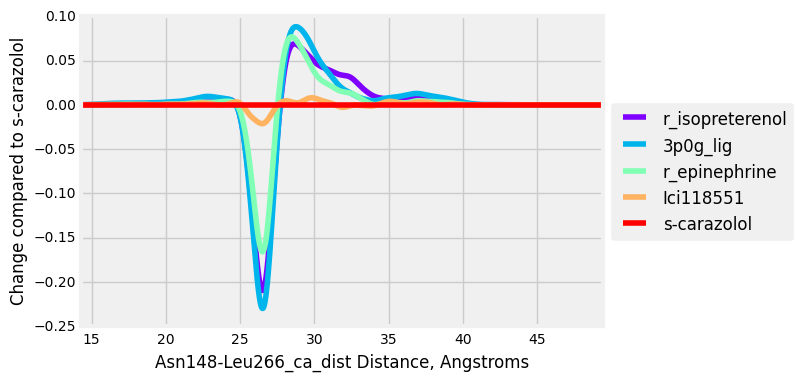

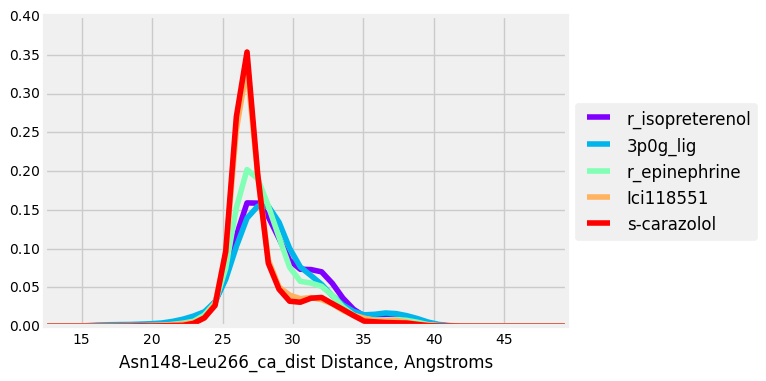

In [43]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *

import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
#compare_feature_to_apo(lig_continuous_features, ["r_isopreterenol", "nebivolol", "3p0g_lig", "r_epinephrine", "s-carvedilol"], "")
ligands = ["r_isopreterenol", "3p0g_lig", "r_epinephrine", 'Ici118551', "s-carazolol"]
compare_feature_to_apo(lig_continuous_features, ligands, "s-carazolol", 'Asn148-Leu266_ca_dist')
plot_overall_kde(lig_continuous_features, ligands, 'Asn148-Leu266_ca_dist')

In [72]:
X_binarized = np.zeros((len(lig_features_eq.keys()), lig_features_eq[lig_features_eq.keys()[0]].shape[1]))
for i, lig in enumerate(lig_features_eq.keys()):
    print(i)
    x = lig_features_eq[lig]
    X_binarized[i,:] = x.astype(bool).sum(axis=0).values
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


In [73]:
X_onehot_df = pd.DataFrame(X_binarized, index=lig_features_eq.keys(), columns=names_onehot)

In [227]:
[n for n in names_onehot if "TYR326" in n]

['TYR326 to CYS327 < 1.467053', 'TYR326 to CYS327 > 1.467053']

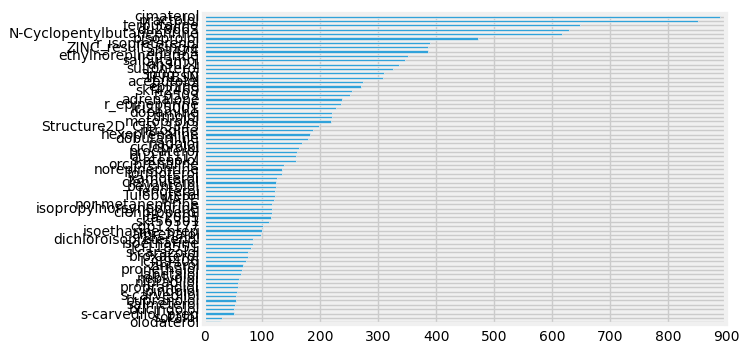

In [78]:
X_onehot_df['rmsd_npxxy_active < 0.334651'].sort(inplace=False).plot(kind='barh')
plt.show()

In [79]:
#X_all_features = np.zeros((len(lig_features_eq.keys()), lig_features_eq[lig_features_eq.keys()[0]].shape[1]))
#for i, lig in enumerate(lig_features_eq.keys()):
#    x = lig_features_eq[lig].mean().values
#    X_all_features[i,:] = x
#X_all_features_df = pd.DataFrame(X_all_features, index=lig_features_eq.keys(), columns=lig_features_eq[lig].columns)
#X_all_features_df = standardize_df(X_all_features_df)

In [57]:
print(np.mean(lig_features_eq["r_isopreterenol"]["rmsd_npxxy_active"].values))
print(np.mean(lig_features_eq["nebivolol"]["rmsd_npxxy_active"].values))

0.593043
0.646128515775


In [54]:
X_all_features_df.sort("rmsd_npxxy_active", inplace=False)

,LEU64 to ALA335,PHE89 to TRP109,PHE61 to THR66,LYS140 to GLU225,MET279 to THR281,ILE135 to HIS269,ASN103 to TYR185,LEU75 to ASP79,PRO138 to PHE139,GLN170 to TYR174,PHE332 to ALA335,GLY280 to THR283,THR68 to ILE72,VAL87 to TYR316,ILE121 to LEU212,ARG175 to THR177,LEU75 to PRO323,GLU268 to LYS270,LEU75 to TRP158,ILE135 to GLN224,ALA76 to ALA78,HIS172 to ARG175,GLN170 to ARG175,HIS93 to LYS305,VAL129 to VAL222,LYS270 to THR274,SER111 to VAL114,TYR132 to GLU225,ASN51 to SER319,ALA181 to THR195,SER204 to VAL206,PHE289 to LEU311,VAL213 to PHE217,THR68 to SER143,THR136 to LEU144,PRO138 to GLN142,SER137 to GLU225,THR136 to ARG221,PHE89 to TRP99,TYR326 to CYS327,ILE72 to THR123,VAL48 to SER319,THR164 to LEU167,PRO168 to HIS172,LEU167 to TYR199,ASP331 to ILE334,ILE169 to TYR199,ALA85 to CYS116,PHE133 to ARG221,ILE135 to PHE139,VAL87 to SER319,ALA128 to MET279,ASP130 to GLN142,ILE169 to ARG175,TYR141 to ALA226,PHE133 to ILE135,GLU107 to THR110,ALA134 to SER143,ASN103 to ALA186,PRO168 to MET171,PHE104 to GLU188,MET98 to PHE101,ALA128 to VAL216,SER203 to ASN293,LEU167 to GLN170,CYS125 to LEU212,TRP173 to ARG175,TRP99 to CYS191,VAL129 to MET279,ARG175 to ALA176,ILE169 to TYR174,GLU268 to ALA271,LEU163 to LEU167,ALA271 to LEU272,TYR132 to PHE217,THR66 to THR73,PHE133 to ALA134,VAL114 to THR164,PRO168 to ARG175,LYS267 to LYS270,TYR174 to THR195,ASN103 to GLU188,PRO168 to ILE169,HIS269 to LYS270,ALA198 to ILE201,ALA91 to TRP109,TRP109 to TYR316,LEU272 to ILE277,THR274 to ILE278,ARG131 to MET279,ILE127 to TYR132,MET156 to SER161,VAL213 to VAL218,PHE332 to ILE334,HIS178 to ASP300,LEU163 to PRO168,VAL213 to VAL216,CYS106 to PHE193,LYS267 to HIS269,TYR185 to THR195,tIC.1,tIC.2,Ala59-Leu266_ca_dist,Asn148-Leu266_ca_dist,Glu268-Arg328_closest_dist,Phe282-Ile325_closest_dist,Thr66-Leu266_ca_dist,rmsd_connector_active,rmsd_connector_inactive,rmsd_npxxy_active,rmsd_npxxy_inactive,tm6_tm3_dist
cimaterol,-1.282553,-0.290849,-0.451228,-1.237602,-0.064643,1.529554,1.777972,-0.696906,0.460344,0.548643,0.103826,0.889362,0.881993,2.055812,0.331845,-0.375548,0.171905,-0.930989,1.339288,0.421038,0.950149,1.050642,0.670695,-0.182335,0.078085,-0.938790,-0.283832,-0.623371,-0.440829,0.456273,-0.151556,-1.993570,-1.042501,-1.950309,-1.200120,0.151989,-0.939344,-0.024666,0.204663,-0.286996,1.139609,-0.419771,-0.612786,-0.709426,-0.588590,0.259449,0.685072,0.460049,-0.693497,0.915662,0.167055,1.855594,-0.353390,-0.283014,0.479480,1.784597,1.309268,0.401544,1.709497,-1.001119,0.794992,-0.077672,-1.071299,-0.567843,-0.034020,-1.328013,0.658997,-0.879782,1.803534,0.125217,-0.085704,-1.147184,-0.950145,1.295928,0.302334,0.071459,-1.416589,0.196237,-0.580879,0.027648,0.645194,-0.125070,-1.069982,0.988091,-0.291629,-0.790498,1.731441,-1.407917,-1.227696,1.293333,1.317868,0.635135,-0.044135,-0.675409,-0.953197,0.597529,-1.330364,1.159652,1.098731,0.596419,-0.155521,0.871679,1.416428,1.606994,0.687361,-0.943125,1.563384,0.426001,1.526112,-1.785853,0.091149,1.783289
du28663,-1.304850,-0.750724,-1.089279,-0.828263,0.184026,0.300671,1.160681,0.758505,-0.912298,-0.248181,-0.479326,0.078550,0.536714,0.175239,-0.014779,0.562062,1.047048,0.412407,0.521624,-0.073980,-0.342782,-0.542372,-0.265947,-0.459704,-0.285937,0.725754,-0.535911,-0.421969,-0.956135,-0.550600,-0.055103,-2.207600,-0.084070,-1.379775,-0.879308,-0.535541,-0.622846,0.174615,0.541231,0.193321,0.829620,-1.020495,0.542642,-0.602079,-0.340976,0.666325,-0.177411,-0.209168,-0.459726,0.846675,-0.559032,0.632563,-0.843135,0.071116,0.354041,-0.661176,0.666780,0.137034,0.810303,0.415131,0.302347,-0.075636,-0.612426,0.907077,-0.063665,-1.101980,-0.451150,-0.194261,0.596020,0.086013,-0.082951,0.359965,0.266882,1.881286,0.372749,-0.131219,-1.989401,-0.278660,-0.119337,0.502282,-0.655760,-0.466552,0.417142,0.961904,0.223355,-0.254821,1.958433,-0.982957,0.215594,-0.081416,-0.383184,-0.600268,0.033424,0.414337,-0.742150,-0.594005,0.040573,0.991098,0.880377,-0.575907,-1.036978,-0.341349,0.223118,0.136561,0.363506,-0.080951,0.230378

In [90]:
salt_bridge = []
for ligand in common_ligands:
    salt_bridge.append(lig_features_eq[ligand].loc[lig_features_eq[ligand]["Glu268-Arg328_dist"] < 5.].shape[0])
    

In [123]:
salt_bridge = []
for ligand in common_ligands:
    salt_bridge.append(lig_features_eq[ligand].loc[lig_features_eq[ligand]["Asn148-Leu266_dist"] > 37.5].shape[0])
pd.DataFrame(salt_bridge, index=common_ligands, columns=["dist"]).sort(columns="dist", inplace=False)

,dist
pindolol,131
Ici89406,263
s-carvedilol,334
Ici118551,633
isopropylnorsynephrine,655
xamoterol,708
MAPE,897
clenproperol,966
orciprenaline,1027
Tulobuterol,1047


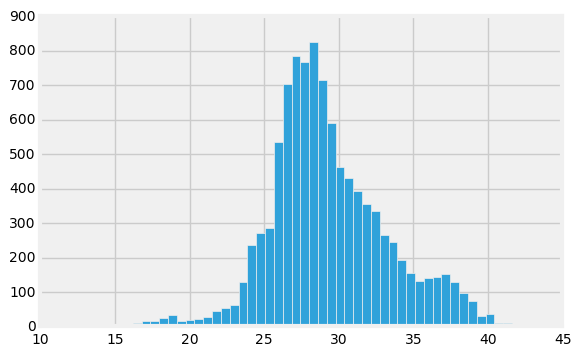

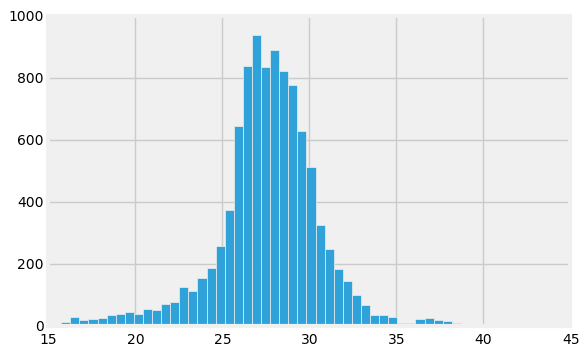

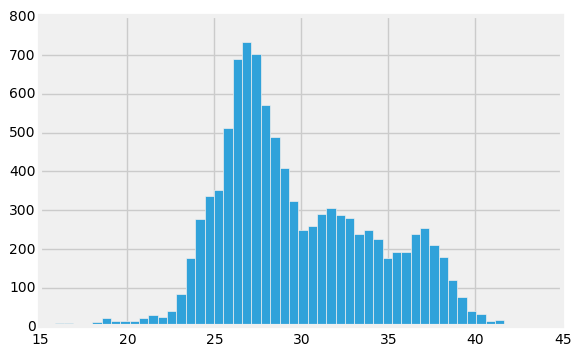

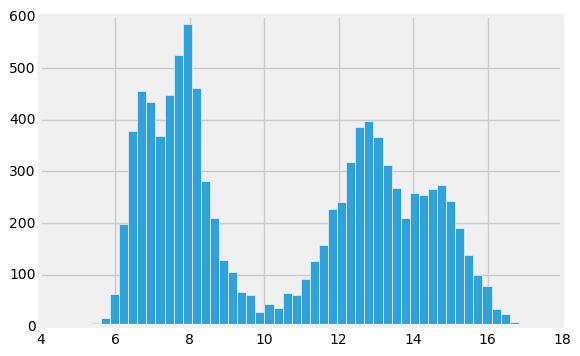

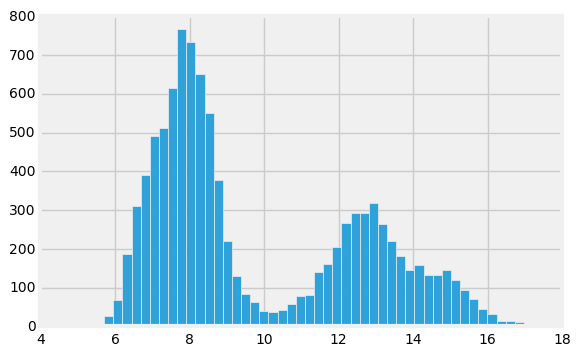

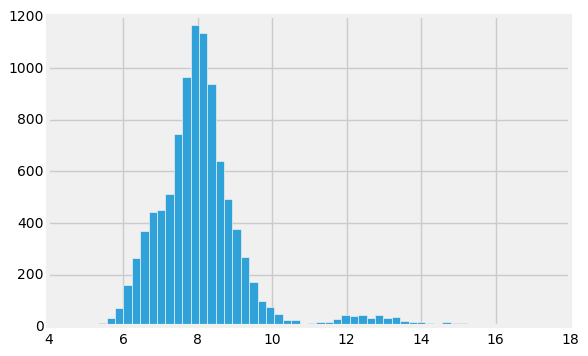

In [28]:
plt.hist(lig_features_eq["r_isopreterenol"]["Asn148-Leu266_ca_dist"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["s-carazolol"]["Asn148-Leu266_ca_dist"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["practolol"]["Asn148-Leu266_ca_dist"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["practolol"]["tm6_tm3_dist"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["r_isopreterenol"]["tm6_tm3_dist"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["s-carvedilol"]["tm6_tm3_dist"].values, bins=50)
plt.show()

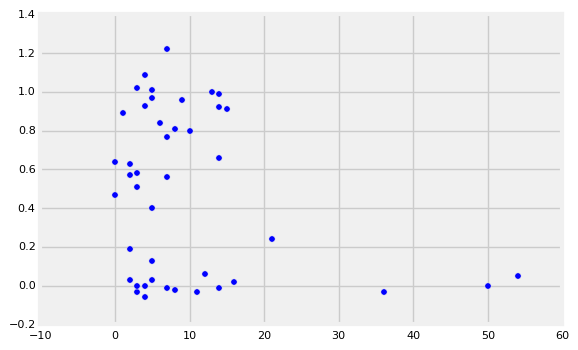

In [212]:
plt.scatter(standardize_df(X_onehot_df.loc[common_ligands][X_onehot_df.columns.values[-13]]).values, bret.loc[common_ligands]["B2AR-Gprotein, Mean"])
plt.show()

In [260]:
df = pd.DataFrame(compute_pearson_matrix(standardize_df(X_onehot_df.loc[common_ligands].transpose()).values.T,bret["B2AR-Gprotein, Mean"].subtract(bret["B2AR-Arrestin, Mean"]).loc[common_agonists].values.reshape((-1,1))), index=X_onehot_df.columns, columns=["correlation"]).sort("correlation", inplace=False)
print(df)

                                                   correlation
LEU167 to TYR199 < 5.050520                          -0.466186
3.407142 < ALA76 to ALA78 < 3.775268                 -0.430129
tIC.2 > 0.973929                                     -0.394754
6.008310 < GLN170 to TYR174 < 7.921661               -0.379426
GLN170 to ARG175 > 8.057241                          -0.375844
PRO168 to ILE169 < 1.348520                          -0.374495
GLU268 to LYS270 < 2.934322                          -0.370317
4.946193 < ILE169 to TYR199 < 7.957817               -0.370266
LEU163 to PRO168 > 4.656065                          -0.363279
THR164 to LEU167 < 4.302561                          -0.358414
4.800671 < TYR185 to THR195 < 9.739821               -0.358396
4.308091 < HIS172 to ARG175 < 6.661784               -0.358131
3.929763 < LYS267 to HIS269 < 4.169402               -0.356948
HIS178 to ASP300 > 8.700941                          -0.355707
ILE121 to LEU212 > 7.910065                          -0

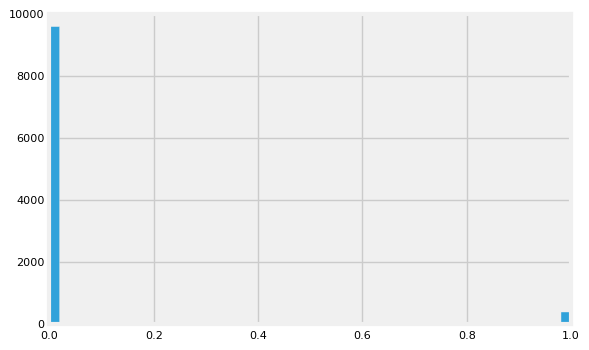

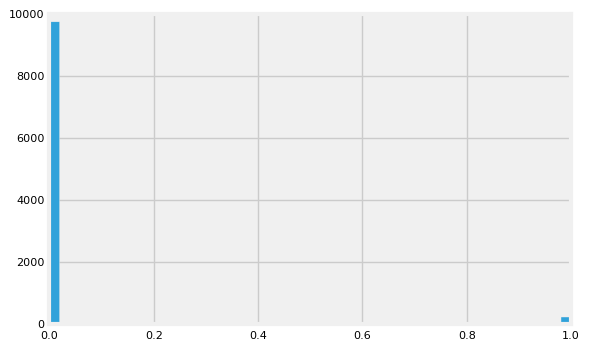

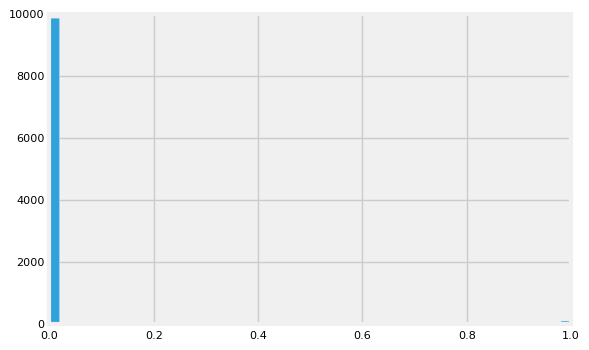

In [257]:
plt.hist(lig_features_eq["r_isopreterenol"]["rmsd_npxxy_active < 0.334651"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["r_epinephrine"]["rmsd_npxxy_active < 0.334651"].values, bins=50)

plt.show()
plt.hist(lig_features_eq["nor-metanephrine"]["rmsd_npxxy_active < 0.334651"].values, bins=50)

plt.show()

In [244]:
lig_features_eq["salbutamol"]["ILE72 to THR123 < 5.431141"]

4134     0
6492     0
16483    0
16457    1
4408     0
5726     1
4560     1
4658     0
4133     1
16140    1
4486     0
4510     1
3975     1
3905     1
16328    0
7697     0
16147    1
4675     1
4507     0
4924     1
8829     1
4334     0
4159     0
3967     0
3950     0
4345     0
16142    1
15186    0
4150     1
3915     1
3840     1
16138    1
4482     1
8191     0
4568     1
13600    0
4184     0
4435     1
14289    1
4437     0
16177    0
4658     0
4236     0
4410     1
3958     0
16360    0
3998     1
3309     0
2065     0
188      0
68       1
3576     1
304      1
21       1
224      1
3351     1
187      0
78       1
3727     1
562      0
7357     1
5160     1
7019     1
14125    1
9532     0
14274    1
7665     1
6921     1
7391     0
14555    0
8860     0
14425    0
9639     0
12502    0
8572     0
12309    0
14075    0
6251     1
8703     0
8148     1
5314     1
14582    0
5848     0
8586     1
8415     0
13934    0
3016     1
1458     0
1884     1
1699     1
3032     0

In [240]:
lig_features_eq["salbutamol"].shape
lig_features_eq["r_isopreterenol"].shape

(9998, 450)

In [226]:
[n for n in X_onehot_df.columns.values.tolist() if "TYR326" in n]

['TYR326 to CYS327 < 1.467053', 'TYR326 to CYS327 > 1.467053']

In [52]:
feature_name_residues_dict.keys()

['rmsd_connector_active',
 'Glu268-Arg328_dist',
 'rmsd_npxxy_inactive',
 'rmsd_npxxy_active',
 'rmsd_connector_inactive',
 'Thr66-Leu266_dist',
 'Asn148-Leu266_dist',
 'tm6_tm3_dist',
 'Ala59-Leu266_dist',
 'Phe282-Ile325_dist']

In [53]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [68]:
cluster_pnas_averages

,Ala59-Leu266_dist,Asn148-Leu266_dist,Glu268-Arg328_dist,Phe282-Ile325_dist,Thr66-Leu266_dist,rmsd_connector_active,rmsd_connector_inactive,rmsd_npxxy_active,rmsd_npxxy_inactive,tm6_tm3_dist
0,26.049809,28.382177,11.560998,7.516563,18.373430,1.518838,0.388698,0.650140,0.347996,8.179388
1,25.749163,27.263571,12.666905,7.720014,17.895409,1.443671,0.634277,0.579011,0.292825,7.771510
2,32.831738,33.857849,16.640007,7.874691,25.469439,1.324196,1.255163,0.497298,0.349084,13.559627
3,33.043613,34.663090,15.545211,7.517486,26.147440,1.280238,1.203950,0.614284,0.431761,13.871881
4,33.737946,35.043312,17.783123,8.382810,26.509466,1.440446,1.009559,0.553217,0.314182,14.536191
5,24.709368,26.605062,12.782294,7.659770,16.858982,1.394020,0.396800,0.576499,0.283452,7.121502
6,25.390369,27.607658,11.742552,7.319459,17.784239,1.475260,0.504868,0.560174,0.287170,8.263805
7,31.268034,31.570145,17.890551,8.132158,23.292034,1.420636,0.710465,0.569661,0.275539,12.826197
8,32.085724,32.308376,17.986958,8.082273,23.970644,1.483463,0.649043,0.567742,0.273648,12.650670
9,24.338871,26.547293,12.245551,7.538155,16.713865,1.425937,0.433148,0.585812,0.296275,7.308797


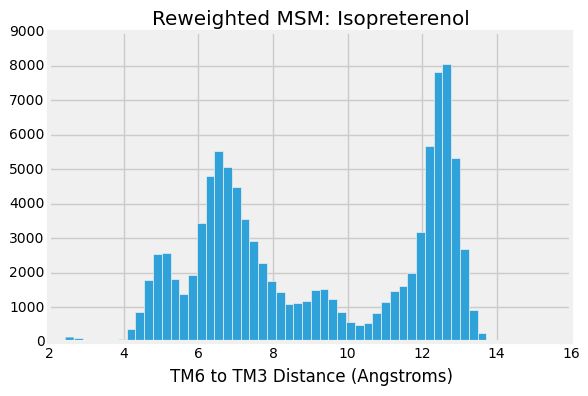

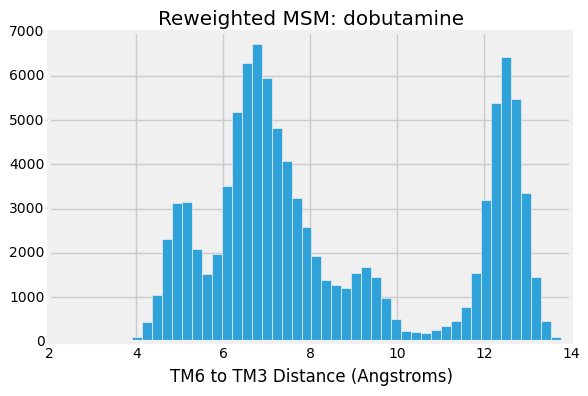

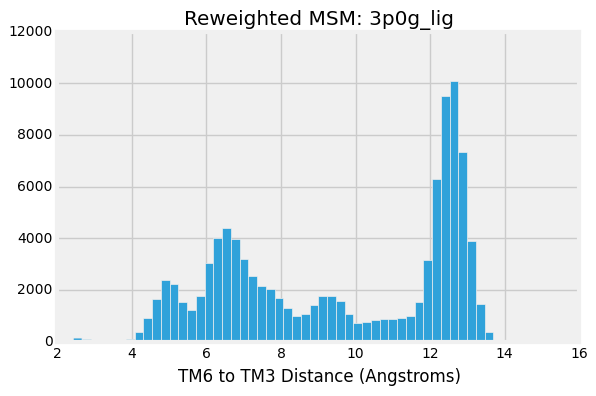

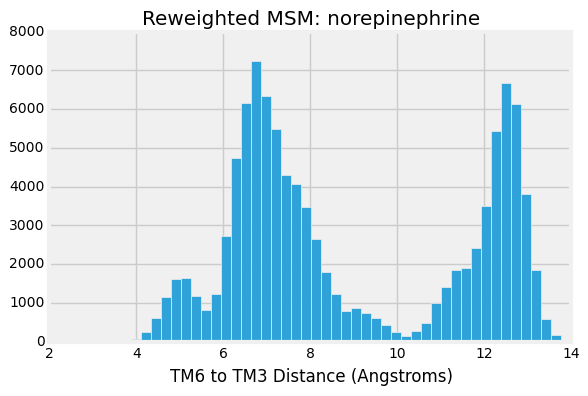

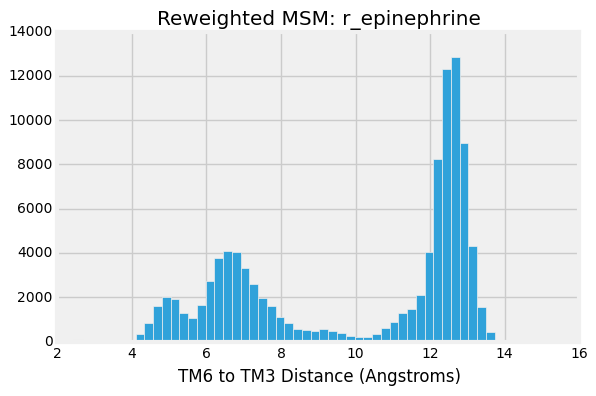

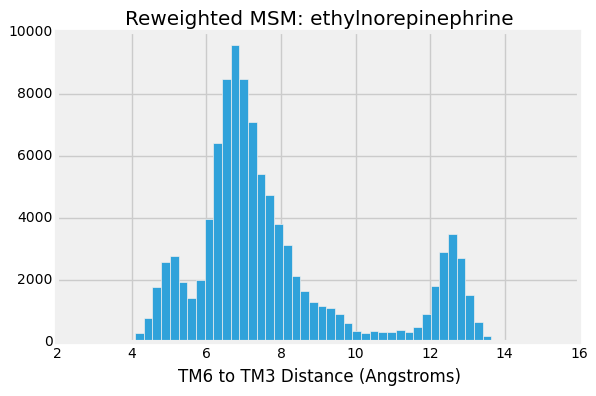

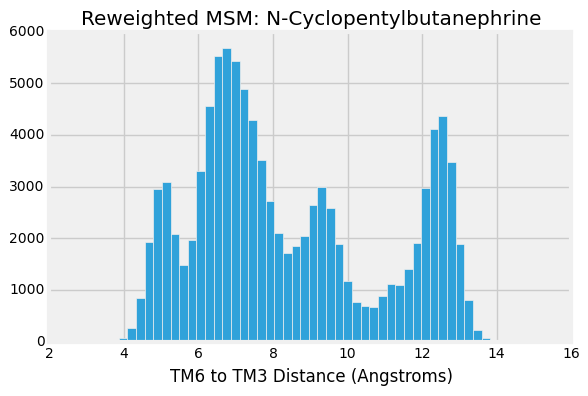

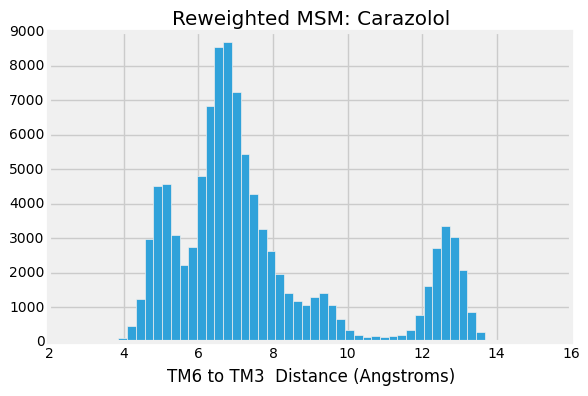

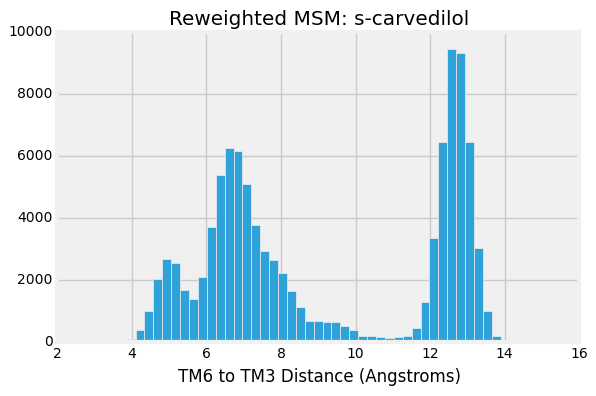

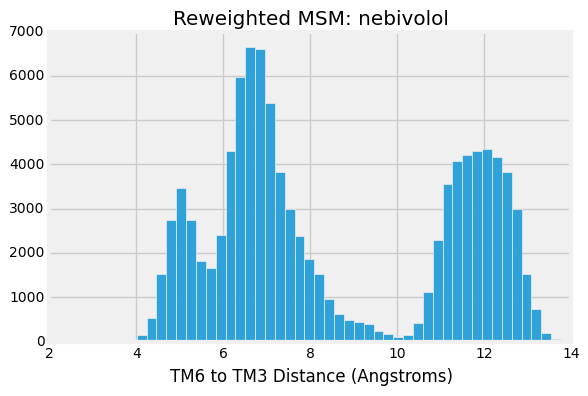

In [98]:
plt.hist(lig_features_eq["r_isopreterenol"]["ASP79 to TYR326"].values, bins=50)
plt.xlabel("TM6 to TM3 Distance (Angstroms)")
plt.title("Reweighted MSM: Isopreterenol")
plt.show()

name = "dobutamine"
plt.hist(lig_features_eq[name]["ASP79 to TYR326"].values, bins=50)
plt.xlabel("TM6 to TM3 Distance (Angstroms)")
plt.title("Reweighted MSM: %s" %name)
plt.show()

name = "3p0g_lig"
plt.hist(lig_features_eq[name]["ASP79 to TYR326"].values, bins=50)
plt.xlabel("TM6 to TM3 Distance (Angstroms)")
plt.title("Reweighted MSM: %s" %name)
plt.show()

name = "norepinephrine"
plt.hist(lig_features_eq[name]["ASP79 to TYR326"].values, bins=50)
plt.xlabel("TM6 to TM3 Distance (Angstroms)")
plt.title("Reweighted MSM: %s" %name)
plt.show()

name = "r_epinephrine"
plt.hist(lig_features_eq[name]["ASP79 to TYR326"].values, bins=50)
plt.xlabel("TM6 to TM3 Distance (Angstroms)")
plt.title("Reweighted MSM: %s" %name)
plt.show()

name = "ethylnorepinephrine"
plt.hist(lig_features_eq[name]["ASP79 to TYR326"].values, bins=50)
plt.xlabel("TM6 to TM3 Distance (Angstroms)")
plt.title("Reweighted MSM: %s" %name)
plt.show()


name = "N-Cyclopentylbutanephrine"
plt.hist(lig_features_eq[name]["ASP79 to TYR326"].values, bins=50)
plt.xlabel("TM6 to TM3 Distance (Angstroms)")
plt.title("Reweighted MSM: %s" %name)
plt.show()


plt.hist(lig_features_eq["s-carazolol"]["ASP79 to TYR326"].values, bins=50)
plt.xlabel("TM6 to TM3  Distance (Angstroms)")
plt.title("Reweighted MSM: Carazolol")
plt.show()

name = "s-carvedilol"
plt.hist(lig_features_eq[name]["ASP79 to TYR326"].values, bins=50)
plt.xlabel("TM6 to TM3 Distance (Angstroms)")
plt.title("Reweighted MSM: %s" %name)
plt.show()

name = "nebivolol"
plt.hist(lig_features_eq[name]["ASP79 to TYR326"].values, bins=50)
plt.xlabel("TM6 to TM3 Distance (Angstroms)")
plt.title("Reweighted MSM: %s" %name)
plt.show()



In [85]:
samples_features_avg_df

,ASP79 to TYR326,ILE127 to LEU275,HIS93 to CYS190,TYR219 to ALA271,ASN51 to GLY320,ASP79 to ASN318,THR274 to CYS327,TYR141 to GLU268,ASN51 to SER319,PHE108 to GLN170,TYR219 to LEU272,LEU75 to PRO323
cluster0,1.271761,0.369151,0.917322,0.617514,0.295410,0.876170,0.618412,0.868484,0.572707,1.484621,0.279760,0.407337
cluster1,0.628489,0.377282,0.640419,0.693151,0.548029,0.606778,0.763180,0.886362,0.394504,0.404929,0.419459,0.835881
cluster2,0.694053,1.071638,0.550258,0.713570,0.538061,0.550874,1.099556,1.952066,0.357713,0.520068,0.840540,0.674248
cluster3,1.164091,0.992918,0.956369,0.532510,0.346560,0.883051,1.050436,1.832317,0.567825,0.482533,0.694753,0.406076
cluster4,0.923821,1.208421,0.937931,0.746420,0.485147,0.737266,1.574057,2.211372,0.294407,0.515353,0.927723,0.845429
cluster5,0.636797,0.399419,0.556691,0.707242,0.528669,0.516805,0.754948,0.649762,0.326531,0.423292,0.331820,0.857365
cluster6,0.923115,0.392219,1.024587,0.591742,0.494952,0.755470,0.711463,0.799413,0.304994,1.550602,0.278977,0.822891
cluster7,0.593574,1.039758,0.550517,0.492084,0.587454,0.543396,1.466993,1.650286,0.396306,0.456580,0.661341,0.832545
cluster8,0.866381,0.946654,0.937343,0.576799,0.480122,0.716921,1.417284,1.811525,0.291164,0.409804,0.763732,0.865658
cluster9,0.688126,0.398793,0.600908,0.634577,0.532113,0.513890,0.767886,0.725294,0.315502,0.836521,0.278136,0.799178


In [33]:
bret = pd.read_excel("/home/enf/b2ar_analysis/bret_bias_study2.xlsx", header=0).dropna().set_index("EvanName")
#bret = pd.read_csv("/home/enf/b2ar_analysis/bias_analysis/bret_bias_study.csv", header=0).dropna().set_index("EvanName")
common_ligands = [n for n in bret.index.values if n in delta_delta_g.columns.values]
bret["B2AR-Arrestin, Mean"].sort(inplace=False)#.subtract(bret["B2AR-Arrestin, Mean"])


EvanName
Ici215001                 0.00
propranolol               0.00
pronethalol               0.00
practolol                 0.00
pindolol                  0.00
nor-metanephrine          0.00
labetalol                 0.00
Ici89406                  0.00
timolol                   0.00
Ici118551                 0.00
dichloroisopreterenol     0.00
xamoterol                 0.00
s-carvedilol              0.00
alprenalol                0.00
cgp12177                  0.00
s-atenolol                0.00
ah3474                    0.00
bisoprolol                0.00
sulfonterol               0.01
dobutamine                0.02
TERBSN                    0.02
MAPE                      0.02
isopropylnorsynephrine    0.02
Tulobuterol               0.03
dopamine                  0.04
ritrodine                 0.04
clenproperol              0.10
clenbuterol               0.13
salbutamol                0.29
ah3021                    0.31
orciprenaline             0.41
terbutaline               0.47

In [261]:
from sklearn.preprocessing import binarize
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
#arrestin_antagonists = ["s-carvedilol", "nebivolol"]
#non_arrestin_antagonists = [n for n in antagonists if n not in arrestin_antagonists and n not in ["Carvedilol"]]
#y = np.array([1. for i in arrestin_antagonists] + [0. for i in non_arrestin_antagonists]).reshape((-1,1))


total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
#common_agonists = arrestin_antagonists + non_arrestin_antagonists
#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#y = np.array([1. for i in biased_ligands] + [0. for i in non_biased_ligands]).reshape((-1,1))
#common_agonists = biased_ligands + non_biased_ligands

#common_agonists = total_activity.loc[total_activity > 0.2].index.values
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].subtract(bret["B2AR-Gprotein, Mean"].loc[common_agonists]).values.reshape((-1,1))

top_clusters = delta_delta_g.index.values
#top_clusters = list(set(delta_delta_g.sort("nebivolol").index.values[:10].tolist() + delta_delta_g.sort("3p0g_lig").index.values[:10].tolist()))
#top_clusters = list(set(delta_delta_g.sort("N-Cyclopentylbutanephrine", inplace=False).index.values[:4].tolist() + delta_delta_g.sort("procaterol", inplace=False).index.values[:4].tolist()))
#agonists_df = [a for a in agonists if a in delta_delta_g.columns.values]
#common_agonists = agonists_df + antagonists
#y = np.array([1. for i in agonists_df] + [0. for i in antagonists]).reshape((-1,1))
common_agonists = common_ligands
y_arr = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
y_gpr = bret["B2AR-Gprotein, Mean"].loc[common_agonists].values.reshape((-1,1))
#y_ori = y_arr - y_gpr
#y_ori = y_arr
#y = y_arr
y = multi_binarizer(y_gpr, [0.2, 0.8])
print(y)

C = null_features.loc[common_agonists].values
#X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X = np.hstack([delta_delta_g.loc[top_clusters][common_agonists].values.T, C*-1.0])
#X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
X_scaled = np.hstack([ddg_scaled.loc[top_clusters][common_agonists].values.T, C*-1.0])
#D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T
D_scaled = np.hstack([docking_normalized.loc[top_clusters][common_agonists].values.T, C*-1.0])
X_diff = np.zeros((X.shape[0], X.shape[1]**2/2))
k=0
for i in range(0,X.shape[1]):
    for j in range(i+1,X.shape[1]):
        X_diff[:,k] = X[:,i] - X[:,j]
        k+=1
X_diff = np.hstack([X_scaled, X_diff, C*-1.0])

all_features_df = pd.concat([ddg_scaled.loc[top_clusters], null_features.multiply(-1.0).transpose(), X_onehot_df.transpose()], axis=0)[common_agonists].transpose()
all_features = all_features_df.values
features = [C*-1.0, X_scaled, all_features]
features_y = [C*-1.0, X_scaled]
feature_names = ["Crystal Structures", "Docking ddG Scaled", "Docking ddG and Observables"]


[[ 2.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]


In [143]:
all_features_df.loc["r_isopreterenol"]

cluster0                                               -0.085583
cluster1                                                1.950468
cluster2                                               -0.948317
cluster3                                               -0.646360
cluster4                                               -0.611851
cluster5                                                0.052454
cluster6                                               -1.647131
cluster7                                               -0.568714
cluster8                                               -0.931062
cluster9                                               -1.086354
cluster10                                               0.069709
cluster11                                               0.086964
cluster12                                              -0.525577
cluster13                                              -0.577341
cluster14                                               0.501076
cluster15                

In [25]:
analysis_dir = "%s_%dsamples" %(analysis_dir, n_samples)
print(analysis_dir)

/home/enf/b2ar_analysis/sparse-tICA_t5_n_components2all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/analysis_n_clusters25_random_1samples


In [26]:
if not os.path.exists(analysis_dir):
    os.makedirs(analysis_dir)

In [51]:
n_trials = 1000

y = multi_binarizer(y_gpr, [0.33, 0.66])
gprot_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/gprot_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f, f)

y = multi_binarizer(y_arr, [0.33, 0.66])
arr_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/arr_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f, f)

print(np.median(np.array(gprot_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
    
    
y = multi_binarizer(y_gpr, [0.2, 0.8])
gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f, f)

y = multi_binarizer(y_arr, [0.2, 0.8])
arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f, f)

print(np.median(np.array(gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))   

y = multi_binarizer(y_gpr, [0.5])
gprot_results_t1000_single0pt5_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/gprot_results_t1000_single0pt5_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_single0pt5_split0pt6_logistic_2f, f)

y = multi_binarizer(y_arr, [0.5])
arr_results_t1000_single0pt5_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/arr_results_t1000_single0pt5_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_single0pt5_split0pt6_logistic_2f, f)
    
print(np.median(np.array(gprot_results_t1000_single0pt5_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_single0pt5_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))

    
y = multi_binarizer(y_gpr, [0.2])
gprot_results_t1000_single0pt2_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/gprot_results_t1000_single0pt2_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_single0pt2_split0pt6_logistic_2f, f)

y = multi_binarizer(y_arr, [0.2])
arr_results_t1000_single0pt2_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/arr_results_t1000_single0pt2_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_single0pt2_split0pt6_logistic_2f, f)

print(np.median(np.array(gprot_results_t1000_single0pt2_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_single0pt2_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))

        
gprot_results_t1000_0pt8_ridge = do_regression_experiment(features, y_gpr, feature_names, n_trials, .8, regularize=False, model="RidgeCV")
with open("%s/gprot_results_t1000_0pt8_ridge.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_0pt8_ridge, f)

arr_results_t1000_0pt8_ridge = do_regression_experiment(features, y_arr, feature_names, n_trials, .8, regularize=False, model="RidgeCV")
with open("%s/arr_results_t1000_0pt8_ridge.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_0pt8_ridge, f)

print(np.median(np.array(gprot_results_t1000_0pt8_ridge["test_r2s"]), axis=0))
print(np.median(np.array(arr_results_t1000_0pt8_ridge["test_r2s"]), axis=0))





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
n_trials = 100
y = multi_binarizer(y_gpr, [0.2])
gprot_results_t100_single0pt2_split0pt9_rfr_2f_obs = do_classification_experiment(features, y, feature_names, n_trials, 0.9, regularize=False, model="rfr")
with open("%s/gprot_results_t100_single0pt2_split0pt9_rfr_2f_obs.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t100_single0pt2_split0pt9_rfr_2f_obs, f)

y = multi_binarizer(y_arr, [0.2])
arr_results_t100_single0pt2_split0pt9_rfr_2f_obs = do_classification_experiment(features, y, feature_names, n_trials, 0.9, regularize=False, model="rfr")
with open("%s/arr_results_t100_single0pt2_split0pt9_rfr_2f_obs.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t100_single0pt2_split0pt9_rfr_2f_obs, f)




0
1
2
3

In [189]:
np.median(np.array(arr_results_t10_single0pt2_split0pt6_logistic_2f_obs["test_roc_aucs"]), axis=0)

array([ 0.72222222,  0.83333333,  0.77777778])

In [198]:
all_features_df.columns.values.tolist()

['cluster0',
 'cluster1',
 'cluster2',
 'cluster3',
 'cluster4',
 'cluster5',
 'cluster6',
 'cluster7',
 'cluster8',
 'cluster9',
 'cluster10',
 'cluster11',
 'cluster12',
 'cluster13',
 'cluster14',
 'cluster15',
 'cluster16',
 'cluster17',
 'cluster18',
 'cluster19',
 'cluster20',
 'cluster21',
 'cluster22',
 'cluster23',
 'cluster24',
 '2rh1_grid',
 '3p0g_grid',
 'null_scores',
 '2.387956 < rmsd_connector_active < 2.752498',
 'rmsd_connector_active > 2.752498',
 'rmsd_connector_inactive < 1.082591',
 '1.082591 < rmsd_connector_inactive < 2.704032',
 'rmsd_connector_inactive > 2.704032',
 'rmsd_npxxy_active < 0.334651',
 '0.334651 < rmsd_npxxy_active < 1.204908',
 '1.204908 < rmsd_npxxy_active < 1.307647',
 'rmsd_npxxy_active > 1.307647',
 'rmsd_npxxy_inactive < 0.945807',
 '0.945807 < rmsd_npxxy_inactive < 1.083314',
 '1.083314 < rmsd_npxxy_inactive < 1.192174',
 'rmsd_npxxy_inactive > 1.192174',
 'tm6_tm3_dist < 10.402095',
 'tm6_tm3_dist > 10.402095',
 'tIC.1 < 0.239101',
 'tIC.1 

ValueError: list.remove(x): x not in list

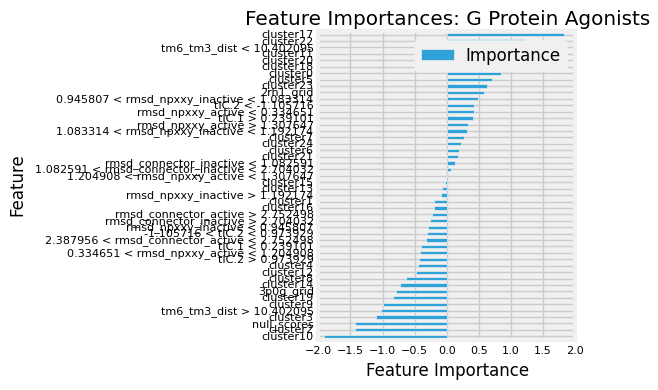

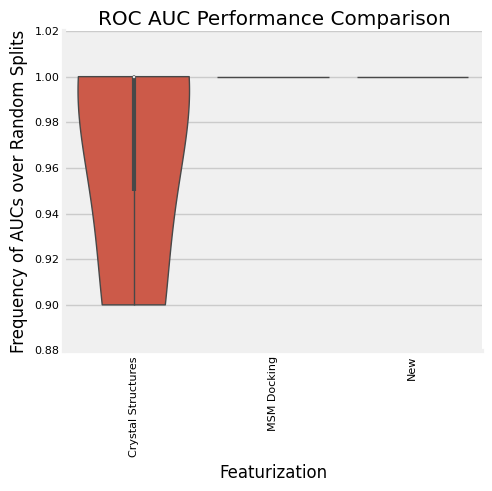

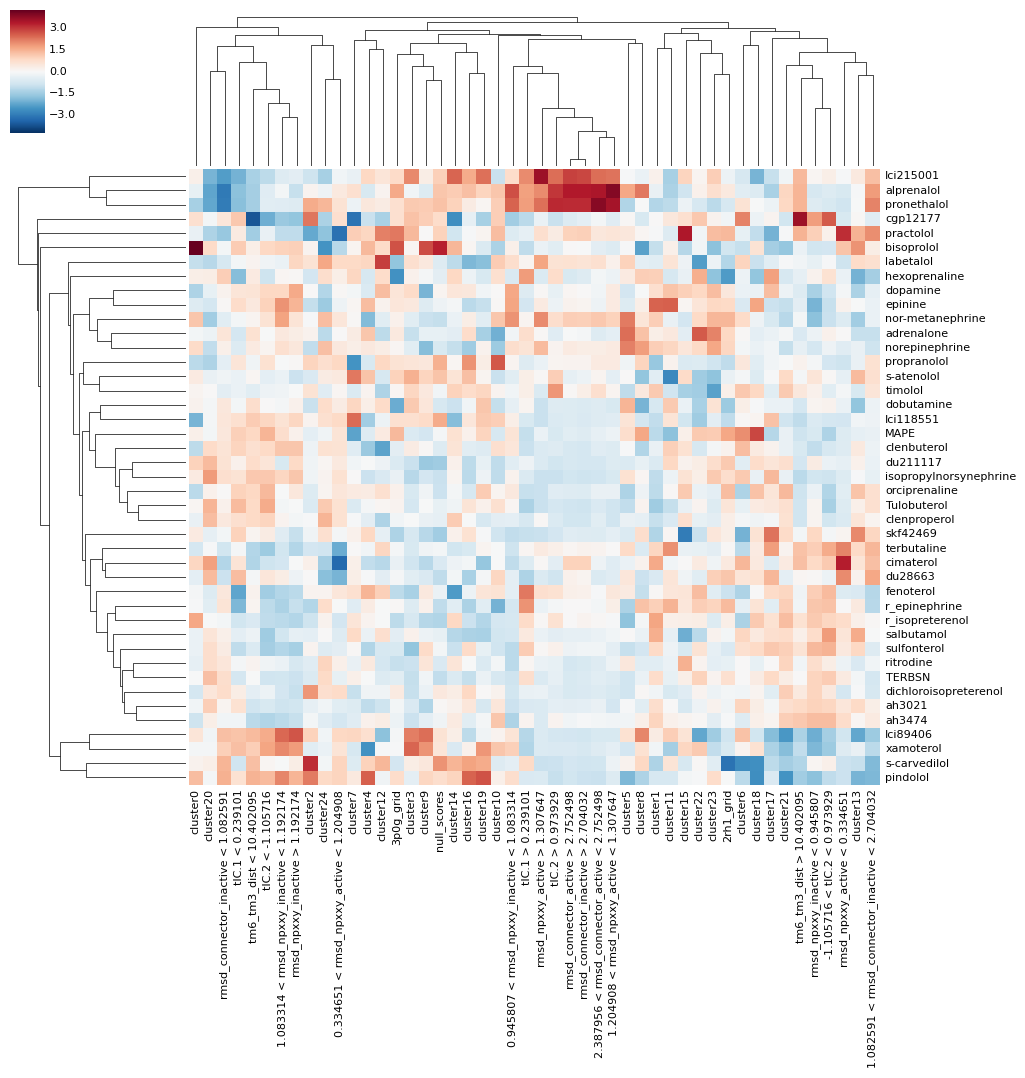

In [191]:
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
analyze_multiclass_experiment(gprot_results_t10_single0pt2_split0pt6_logistic_2f_obs, ["Crystal Structures", "MSM Docking", "New"],all_features_df.columns.values.tolist(), common_agonists, analysis_dir, ["G Protein Antagonists", "G Protein Agonists"], all_features_df.values, exp_title="G Protein Two Class", coef_name="Logistic Coefficient")


In [181]:
all_features_df.columns.values.tolist()

['cluster0',
 'cluster1',
 'cluster2',
 'cluster3',
 'cluster4',
 'cluster5',
 'cluster6',
 'cluster7',
 'cluster8',
 'cluster9',
 'cluster10',
 'cluster11',
 'cluster12',
 'cluster13',
 'cluster14',
 'cluster15',
 'cluster16',
 'cluster17',
 'cluster18',
 'cluster19',
 'cluster20',
 'cluster21',
 'cluster22',
 'cluster23',
 'cluster24',
 '2rh1_grid',
 '3p0g_grid',
 'null_scores']

In [55]:
print(np.median(np.array(gprot_results_t1000_0pt8_ridge["test_r2s"]), axis=0))
print(np.median(np.array(arr_results_t1000_0pt8_ridge["test_r2s"]), axis=0))
print("/n")

print(np.median(np.array(gprot_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print("/n")

print(np.median(np.array(gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print("/n")

print(np.median(np.array(gprot_results_t1000_single0pt5_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_single0pt5_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print("/n")

print(np.median(np.array(gprot_results_t1000_single0pt2_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_single0pt2_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))





[ 0.37498635  0.45232216]
[ 0.0771582  0.1413958]
/n
[ 0.75396825  0.8484127 ]
[ 0.75429894  0.8505291 ]
/n
[ 0.80687831  0.84100529]
[ 0.73611111  0.88690476]
/n
[ 0.9   0.95]
[ 0.85714286  0.85714286]
/n
[ 1.  1.]
[ 0.77777778  0.88888889]


['MSM State 0', 'MSM State 1', 'MSM State 2', 'MSM State 3', 'MSM State 4', 'MSM State 5', 'MSM State 6', 'MSM State 7', 'MSM State 8', 'MSM State 9', 'MSM State 10', 'MSM State 11', 'MSM State 12', 'MSM State 13', 'MSM State 14', 'MSM State 15', 'MSM State 16', 'MSM State 17', 'MSM State 18', 'MSM State 19', 'MSM State 20', 'MSM State 21', 'MSM State 22', 'MSM State 23', 'MSM State 24', 'Inactive Crystal', 'Active Crystal', 'Crystal Difference']


ValueError: list.remove(x): x not in list

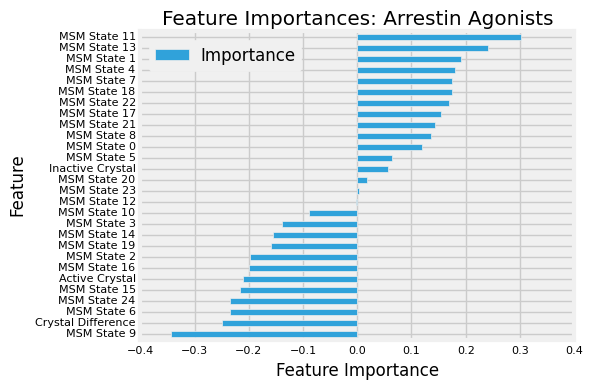

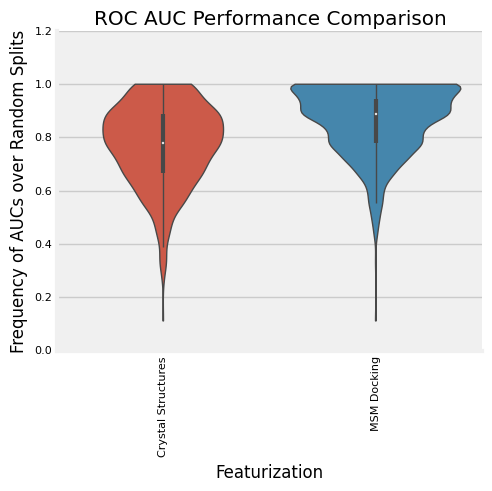

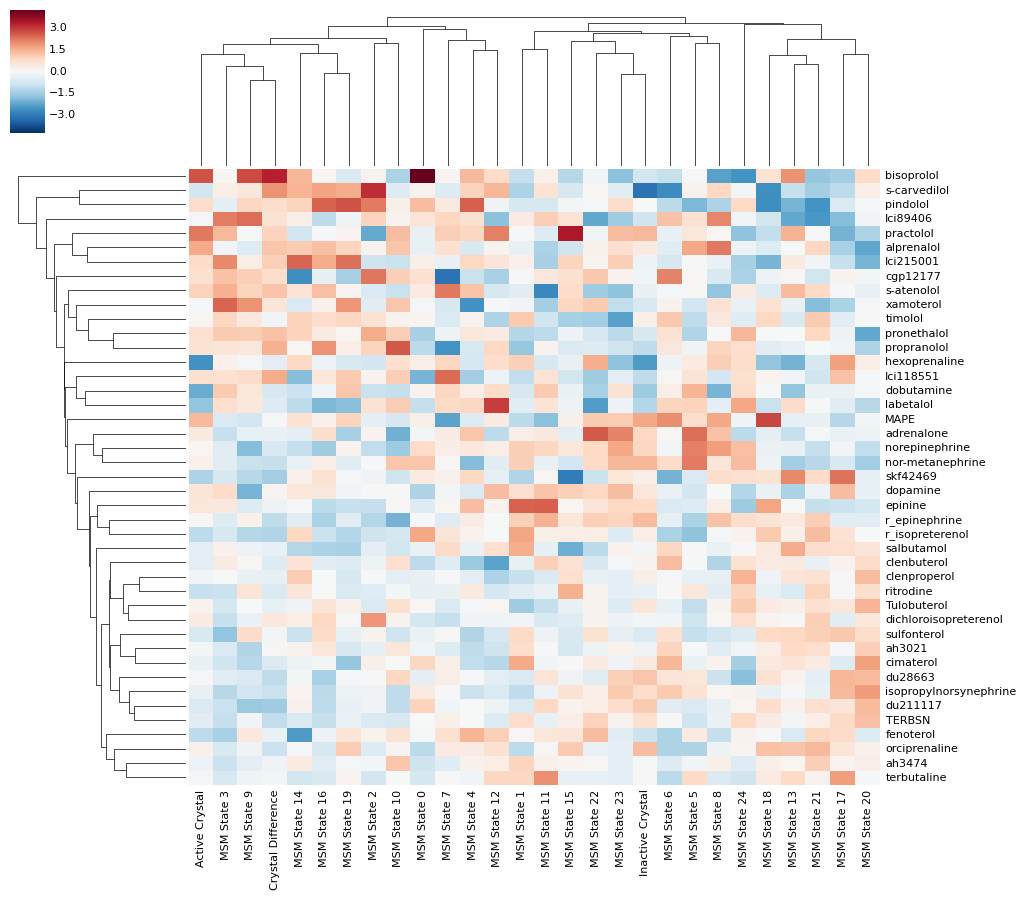

ValueError: list.remove(x): x not in list

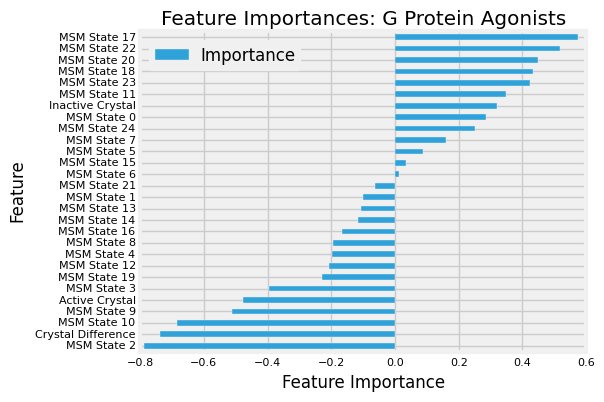

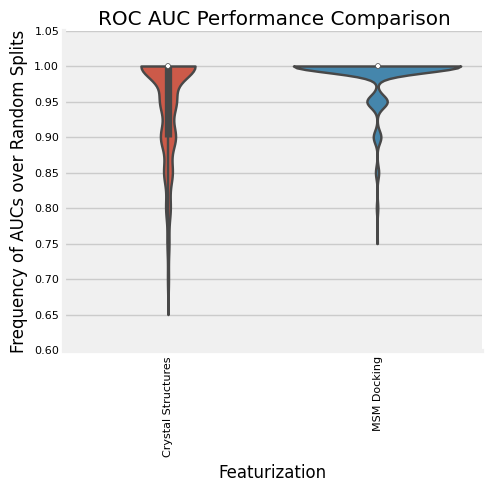

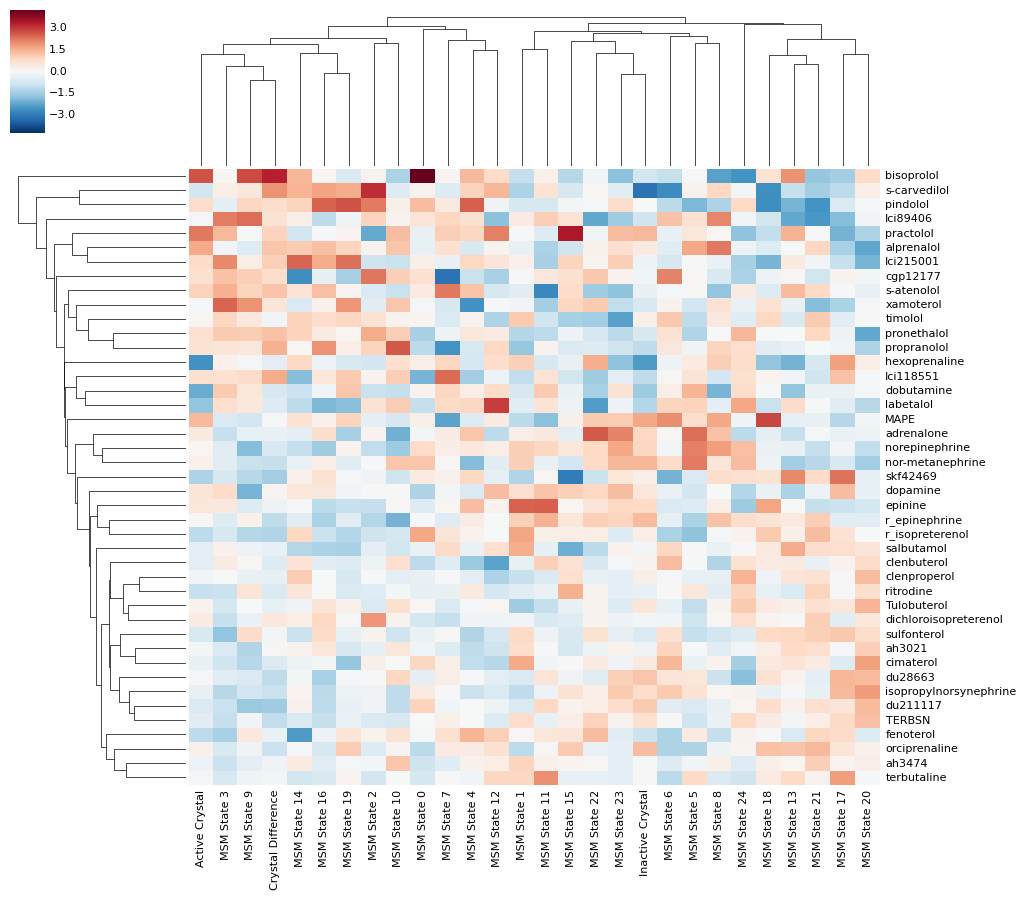

In [139]:
import plots
reload(plots)
from plots import *

import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *


feature_names = top_clusters.tolist() +  ["Inactive Crystal", "Active Crystal", "Crystal Difference"] 
feature_names = [s.replace("cluster", "MSM State ") for s in feature_names]
print(feature_names)

#with open("%s/gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f.pkl" %analysis_dir, "rb") as f:
#    gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f = pickle.load(f)
#analyze_multiclass_experiment(gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f, ["Crystal Structures", "MSM Docking"], feature_names, common_agonists, analysis_dir, ["G Protein Antagonists", "G Protein Partial Agonists", "G Protein Full Agonists"], X_scaled, exp_title="GProtein Three Clas 1000 Trials", coef_name="Logistic Coefficient")


#with open("%s/arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f.pkl" %analysis_dir, "rb") as f:
#    arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f = pickle.load(f)
#analyze_multiclass_experiment(arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f, ["Crystal Structures", "MSM Docking"], feature_names, common_agonists, analysis_dir, ["Arrestin Antagonists", "Arrestin Partial Agonists", "Arrestin Full Agonists"], X_scaled, exp_title="Arrestin Three Class 1000 Trials", coef_name="Logistic Coefficient")

#plt.clf()
#analyze_multiclass_experiment(gprot_results_t100_single0pt2_split0pt6_logistic_2f, ["Crystal Structures", "MSM Docking"], feature_names, common_agonists, analysis_dir, ["G Protein Antagonists", "G Protein Agonists"], X_scaled, exp_title="Two Class", coef_name="Logistic Coefficient")
with open("%s/arr_results_t1000_single0pt2_split0pt6_logistic_2f.pkl" %analysis_dir, "rb") as f:
    arr_results_t1000_single0pt2_split0pt6_logistic_2f = pickle.load(f)
analyze_multiclass_experiment(arr_results_t1000_single0pt2_split0pt6_logistic_2f, ["Crystal Structures", "MSM Docking"],feature_names, common_agonists, analysis_dir, ["Arrestin Antagonists", "Arrestin Agonists"], X_scaled, exp_title="Arrestin Two Class", coef_name="Logistic Coefficient")

with open("%s/gprot_results_t1000_single0pt2_split0pt6_logistic_2f.pkl" %analysis_dir, "rb") as f:
    gprot_results_t1000_single0pt2_split0pt6_logistic_2f = pickle.load(f)
analyze_multiclass_experiment(gprot_results_t1000_single0pt2_split0pt6_logistic_2f, ["Crystal Structures", "MSM Docking"],feature_names, common_agonists, analysis_dir, ["G Protein Antagonists", "G Protein Agonists"], X_scaled, exp_title="G Protein Two Class", coef_name="Logistic Coefficient")



In [40]:
mpl.rcParams.keys()

[u'agg.path.chunksize',
 u'animation.avconv_args',
 u'animation.avconv_path',
 u'animation.bitrate',
 u'animation.codec',
 u'animation.convert_args',
 u'animation.convert_path',
 u'animation.ffmpeg_args',
 u'animation.ffmpeg_path',
 u'animation.frame_format',
 u'animation.mencoder_args',
 u'animation.mencoder_path',
 u'animation.writer',
 u'axes.axisbelow',
 u'axes.color_cycle',
 u'axes.edgecolor',
 u'axes.facecolor',
 u'axes.formatter.limits',
 u'axes.formatter.use_locale',
 u'axes.formatter.use_mathtext',
 u'axes.formatter.useoffset',
 u'axes.grid',
 u'axes.grid.which',
 u'axes.hold',
 u'axes.labelcolor',
 u'axes.labelsize',
 u'axes.labelweight',
 u'axes.linewidth',
 u'axes.titlesize',
 u'axes.titleweight',
 u'axes.unicode_minus',
 u'axes.xmargin',
 u'axes.ymargin',
 u'axes3d.grid',
 u'backend',
 u'backend.qt4',
 u'backend.qt5',
 u'backend_fallback',
 u'contour.negative_linestyle',
 u'datapath',
 u'docstring.hardcopy',
 u'examples.directory',
 u'figure.autolayout',
 u'figure.dpi',
 u

In [30]:
analysis_dir

'/home/enf/b2ar_analysis/sparse-tICA_t5_n_components2all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/analysis_n_clusters25_random'

In [56]:
X_scaled[:,25]

array([ -8.68, -10.16,  -9.97, -10.04,  -9.31, -10.31, -11.01,  -9.12,
       -10.12,  -9.34,  -9.64, -10.04, -12.04,  -9.25,  -8.36,  -8.28,
        -8.05, -11.16, -13.21, -11.39, -10.26, -11.04,  -8.86,  -9.53,
       -11.63,  -7.62,  -9.51,  -8.73,  -8.62,  -7.94,  -8.09,  -9.91,
        -8.  , -10.87, -11.39, -10.36,  -9.52, -10.77,  -9.84,  -8.94,
        -9.55, -10.85])

In [57]:
ddg_scaled["salbutamol"].sort(inplace=False
                             )

cluster0    -1.428072
cluster16   -1.351568
cluster15   -1.190060
cluster8    -1.037052
cluster4    -0.782039
cluster14   -0.722536
cluster22   -0.671534
cluster2    -0.620531
cluster6    -0.450523
cluster7    -0.408020
cluster11   -0.391020
cluster19   -0.357018
cluster9    -0.357018
cluster12   -0.221011
cluster10    0.017001
cluster3     0.187009
cluster13    0.331517
cluster18    0.399520
cluster17    0.476024
cluster23    0.603530
cluster24    0.756538
cluster5     0.977549
cluster20    1.734087
cluster1     1.887095
cluster21    2.618132
Name: salbutamol, dtype: float64

In [156]:
arr_results_t100_multi_0pt6_logistic = arr_results_t100_multi_0pt_6_rfr 

= arr_results_t1000_multi_0pt_6_rfr 

In [171]:
save_file = "%s/arr_results_t1000_multi_0pt6_logistic.pkl" %(analysis_dir)
with open(save_file, "wb") as f:
    pickle.dump(arr_results_t1000_multi_0pt6_logistic, f)
    

In [172]:
save_file = "%s/gprot_results_t1000_multi_0pt6_logistic.pkl" %(analysis_dir)
with open(save_file, "wb") as f:
    pickle.dump(gprot_results_t1000_multi_0pt6_logistic, f)
    

In [114]:
np.median(np.array(arr_results_t1000_0pt5_md3_ridge["test_r2s"]), axis=0)

array([ 0.05356175,  0.10558391,  0.07959293,  0.10558391, -3.37110258])

In [115]:
np.median(np.array(arr_results_t1000_0pt5_md3_ridge["kendall_pvalues"]), axis=0)

array([ 0.10238564,  0.10386196,  0.13321286,  0.10386196,  0.37634451])

In [ ]:
np.median(np.array(arr_results_t1000_0pt5_md3_ridge["kendall_pvalues"]), axis=0)

In [169]:
np.median(np.array(arr_results_t1000_multi_0pt6_logistic["test_roc_aucs"]), axis=0)


array([ 0.76256614,  0.87301587,  0.83630952,  0.87301587,  0.81944444])

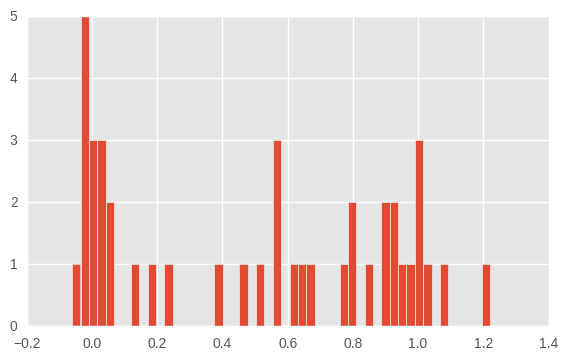

In [192]:
plt.hist(y_gpr, bins=50)
plt.show()

In [ ]:
from sklearn.preprocessing import binarize
#arrestin_antagonists = ["s-carvedilol", "nebivolol"]
#non_arrestin_antagonists = [n for n in antagonists if n not in arrestin_antagonists and n not in ["Carvedilol"]]
#y = np.array([1. for i in arrestin_antagonists] + [0. for i in non_arrestin_antagonists]).reshape((-1,1))


total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
#common_agonists = arrestin_antagonists + non_arrestin_antagonists
#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#y = np.array([1. for i in biased_ligands] + [0. for i in non_biased_ligands]).reshape((-1,1))
#common_agonists = biased_ligands + non_biased_ligands

#common_agonists = total_activity.loc[total_activity > 0.2].index.values
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].subtract(bret["B2AR-Gprotein, Mean"].loc[common_agonists]).values.reshape((-1,1))

top_clusters = delta_delta_g.index.values
#top_clusters = list(set(delta_delta_g.sort("nebivolol").index.values[:10].tolist() + delta_delta_g.sort("3p0g_lig").index.values[:10].tolist()))
#top_clusters = list(set(delta_delta_g.sort("N-Cyclopentylbutanephrine", inplace=False).index.values[:4].tolist() + delta_delta_g.sort("procaterol", inplace=False).index.values[:4].tolist()))
#agonists_df = [a for a in agonists if a in delta_delta_g.columns.values]
#common_agonists = agonists_df + antagonists
#y = np.array([1. for i in agonists_df] + [0. for i in antagonists]).reshape((-1,1))
common_agonists = common_ligands
y_arr = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
y_gpr = bret["B2AR-Gprotein, Mean"].loc[common_agonists].values.reshape((-1,1))
#y_ori = y_arr - y_gpr
#y_ori = y_arr
y = multi_binarizer(y_arr, [0.33, 0.66])
#y = binarize(y_gpr, threshold=0.2)

C = null_features.loc[common_agonists].values
#X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X = np.hstack([delta_delta_g.loc[top_clusters][common_agonists].values.T, C])
#X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
X_scaled = np.hstack([ddg_scaled.loc[top_clusters][common_agonists].values.T, C])
#D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T
D_scaled = np.hstack([docking_normalized.loc[top_clusters][common_agonists].values.T, C])
X_diff = np.zeros((X.shape[0], X.shape[1]**2/2))
k=0
for i in range(0,X.shape[1]):
    for j in range(i+1,X.shape[1]):
        X_diff[:,k] = X[:,i] - X[:,j]
        k+=1
X_diff = np.hstack([X_scaled, X_diff, C])

features = [C, D_scaled, X, X_scaled, X_diff]
features_y = [C, D_scaled, X, X_scaled, X_diff]
feature_names = ["Crystal Structures", "Normalized Docking", "Docking ddG", "Docking ddg Scaled", "Docking ddG Differences"]

n_trials = 1000
test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=False)
#arr_results_t100_0pt9_md3 = do_regression_experiment(features, y, feature_names, n_trials, 0.9, regularize=False)

In [ ]:
save_file = "%s/arr_results_t1000_0pt9_md3.pkl" %analysis_dir
with open(save_file, "wb") as f:
    pickle.dump(arr_results_t1000_0pt9_md3, f)

In [ ]:
print(np.median(np.array(arr_results_t1000_0pt9_md3["test_r2s"]), axis=0))

In [ ]:
from sklearn.preprocessing import binarize
#arrestin_antagonists = ["s-carvedilol", "nebivolol"]
#non_arrestin_antagonists = [n for n in antagonists if n not in arrestin_antagonists and n not in ["Carvedilol"]]
#y = np.array([1. for i in arrestin_antagonists] + [0. for i in non_arrestin_antagonists]).reshape((-1,1))


total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
#common_agonists = arrestin_antagonists + non_arrestin_antagonists
#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#y = np.array([1. for i in biased_ligands] + [0. for i in non_biased_ligands]).reshape((-1,1))
#common_agonists = biased_ligands + non_biased_ligands

common_agonists = total_activity.loc[total_activity > 0.2].index.values
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].subtract(bret["B2AR-Gprotein, Mean"].loc[common_agonists]).values.reshape((-1,1))

top_clusters = delta_delta_g.index.values
#top_clusters = list(set(delta_delta_g.sort("nebivolol").index.values[:10].tolist() + delta_delta_g.sort("3p0g_lig").index.values[:10].tolist()))
#top_clusters = list(set(delta_delta_g.sort("N-Cyclopentylbutanephrine", inplace=False).index.values[:4].tolist() + delta_delta_g.sort("procaterol", inplace=False).index.values[:4].tolist()))
#agonists_df = [a for a in agonists if a in delta_delta_g.columns.values]
#common_agonists = agonists_df + antagonists
#y = np.array([1. for i in agonists_df] + [0. for i in antagonists]).reshape((-1,1))
#common_agonists = common_ligands
y_arr = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
y_gpr = bret["B2AR-Gprotein, Mean"].loc[common_agonists].values.reshape((-1,1))
y_ori = y_arr - y_gpr
#y_ori = y_arr
#y = y_arr
y = binarize(y_ori, threshold=-0.2)

C = null_features.loc[common_agonists].values
#X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X = np.hstack([delta_delta_g.loc[top_clusters][common_agonists].values.T, C])
#X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
X_scaled = np.hstack([ddg_scaled.loc[top_clusters][common_agonists].values.T, C])
#D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T
D_scaled = np.hstack([docking_normalized.loc[top_clusters][common_agonists].values.T, C])
X_diff = np.zeros((X.shape[0], X.shape[1]**2/2))
k=0
for i in range(0,X.shape[1]):
    for j in range(i+1,X.shape[1]):
        X_diff[:,k] = X[:,i] - X[:,j]
        k+=1
X_diff = np.hstack([X_scaled, X_diff, C])

features = [C, D_scaled, X, X_scaled, X_diff]
features_y = [C, D_scaled, X, X_scaled]
feature_names = ["Crystal Structures", "Normalized Docking", "Docking ddG", "Docking ddg Scaled", "Docking ddG Differences"]

n_trials = 1000
#arr_classification_results_t1000_0pt6 = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False)
arr_vs_gprot_classification_results_t1000_0pt8 = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=False)
#arr_results_1000 = do_regression_experiment(features, y, feature_names, n_trials, 0.8, regularize=False)

In [ ]:
with open("%s/arr_vs_gprot_classification_results_t100_0pt8.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_vs_gprot_classification_results_t100_0pt8, f)

In [ ]:
print(np.median(np.array(arr_vs_gprot_classification_results_t100_0pt8["test_aucs"]), axis=0))

In [ ]:
plt.hist(y_ori,bins=50)
plt.show()

In [ ]:

save_file = "%s/arr_classification_results_t1000_0pt6.pkl" %analysis_dir
with open(save_file, "wb") as f:
    pickle.dump(arr_classification_results_t1000_0pt6, f)

In [ ]:
np.median(np.array(arr_classification_results_t1000_0pt6["test_log_aucs"]),axis=0)

In [ ]:
from sklearn.preprocessing import binarize
#arrestin_antagonists = ["s-carvedilol", "nebivolol"]
#non_arrestin_antagonists = [n for n in antagonists if n not in arrestin_antagonists and n not in ["Carvedilol"]]
#y = np.array([1. for i in arrestin_antagonists] + [0. for i in non_arrestin_antagonists]).reshape((-1,1))


total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
#common_agonists = arrestin_antagonists + non_arrestin_antagonists
#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#y = np.array([1. for i in biased_ligands] + [0. for i in non_biased_ligands]).reshape((-1,1))
#common_agonists = biased_ligands + non_biased_ligands

#common_agonists = total_activity.loc[total_activity > 0.2].index.values
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].subtract(bret["B2AR-Gprotein, Mean"].loc[common_agonists]).values.reshape((-1,1))

top_clusters = delta_delta_g.index.values
#top_clusters = list(set(delta_delta_g.sort("nebivolol").index.values[:10].tolist() + delta_delta_g.sort("3p0g_lig").index.values[:10].tolist()))
#top_clusters = list(set(delta_delta_g.sort("N-Cyclopentylbutanephrine", inplace=False).index.values[:4].tolist() + delta_delta_g.sort("procaterol", inplace=False).index.values[:4].tolist()))
#agonists_df = [a for a in agonists if a in delta_delta_g.columns.values]
#common_agonists = agonists_df + antagonists
#y = np.array([1. for i in agonists_df] + [0. for i in antagonists]).reshape((-1,1))
common_agonists = common_ligands
y_arr = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
y_gpr = bret["B2AR-Gprotein, Mean"].loc[common_agonists].values.reshape((-1,1))
#y_ori = y_arr - y_gpr
y_ori = y_arr
#y = y_arr
y = binarize(y_arr, threshold=0.2)

C = null_features.loc[common_agonists].values
#X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X = np.hstack([delta_delta_g.loc[top_clusters][common_agonists].values.T, C])
#X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
X_scaled = np.hstack([ddg_scaled.loc[top_clusters][common_agonists].values.T, C])
#D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T
D_scaled = np.hstack([docking_normalized.loc[top_clusters][common_agonists].values.T, C])
X_diff = np.zeros((X.shape[0], X.shape[1]**2/2))
k=0
for i in range(0,X.shape[1]):
    for j in range(i+1,X.shape[1]):
        X_diff[:,k] = X[:,i] - X[:,j]
        k+=1
X_diff = np.hstack([X_scaled, X_diff, C])

features = [C, D_scaled, X, X_scaled, X_diff]
features_y = [C, D_scaled, X, X_scaled]
feature_names = ["Crystal Structures", "Normalized Docking", "Docking ddG", "Docking ddg Scaled", "Docking ddG Differences"]

n_trials = 1000
test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=False)
#arr_auc_results = do_regression_experiment(features, y, feature_names, n_trials, 0.8, regularize=False)

In [ ]:
np.median(np.array(test_log_aucs),axis=0)

In [ ]:
np.median(np.array(gprot_results["test_r2s"]),axis=0)

In [ ]:
gprot_results["test_r2s"]

In [ ]:
features_y = copy.deepcopy(features)
features_y.append(y)
train_test_arrays = train_test_split(*features_y, train_size=0.8)
print([a.shape for a in train_test_arrays])

In [ ]:
train_test_arrays = train_test_split(*features_y, train_size=0.8)
print([a.shape for a in train_test_arrays])

In [ ]:
gprot_results = copy.deepcopy([test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances])
#import pickle
gprot_file = "%s/gprot_results_0pt2_XP_no-regularization.pkl"
with open("%s/gprot_results_0pt2_XP_no-regularization.pkl", "wb") as f:
    pickle.dump(gprot_results, f)
with open(gprot_file) as f:
    test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances = pickle.load(f)

In [ ]:
#arrestin_results = copy.deepcopy([test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances])
#import pickle
arrestin_file = "%s/arrestin_results_0pt2_XP_no-regularization.pkl"
#with open("%s/arrestin_results_0pt2_XP_no-regularization.pkl", "wb") as f:
#    pickle.dump(arrestin_results, f)
with open(arrestin_file) as f:
    test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances = pickle.load(f)

In [ ]:
#arrestin_rfr_results = copy.deepcopy([test_r2s, rfr_feature_importances])
arrestin_rfr_file = "%s/arrestin_results_rfr_XP_no-regularization.pkl"
#with open("%s/arrestin_results_rfr_XP_no-regularization.pkl", "wb") as f:
#    pickle.dump(arrestin_rfr_results, f)
with open(arrestin_rfr_file) as f:
    test_r2s, rfr_feature_importances = pickle.load(f)

In [ ]:
#gprot_rfr_results = copy.deepcopy([test_r2s, rfr_feature_importances])
gprot_rfr_file = "%s/gprot_results_rfr_XP_no-regularization.pkl"
#with open("%s/gprot_results_rfr_XP_no-regularization.pkl", "wb") as f:
#    pickle.dump(gprot_rfr_results, f)
with open(gprot_rfr_file) as f:
    test_r2s, rfr_feature_importances = pickle.load(f)

In [ ]:
test_aucs = np.array(test_aucs)
plt.clf()
plt.boxplot(test_aucs[:,2]-test_aucs[:,0])
plt.show()

In [ ]:
test_log_aucs = np.array(test_log_aucs)
np.percentile(test_aucs[:,2]-test_aucs[:,0], 50)

In [ ]:
import sklearn
null_preds = binarize(C[:,2])
sklearn.metrics.roc_auc_score(binarize(y, 0.2).ravel(), null_preds.ravel())

In [ ]:
test_aucs = np.array(test_aucs)
print(np.median(test_aucs, axis=0))
print(np.median(test_aucs[:,2] - test_aucs[:,0]))

In [ ]:
n_successes = len(np.where(test_aucs[:,2]-test_aucs[:,0] > 0.)[0])
nobs = test_aucs.shape[0]
statsmodels.stats.proportion.proportion_confint(count=n_successes, nobs=nobs, alpha=0.01, method='wilson')


In [ ]:
np.median(np.array(test_r2s),axis=0)

In [ ]:
arrestin_vs_gprot_results = copy.deepcopy([test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances])
import pickle
with open("%s/arrestin_vs_gprot_results_-0pt2_XP.pkl", "wb") as f:
    pickle.dump(arrestin_vs_gprot_results, f)

In [ ]:
arrestin_vs_gprot_rfr_results = copy.deepcopy([test_r2s, rfr_feature_importances])
import pickle
with open("%s/arrestin_vs_gprot_rfr_results_XP.pkl", "wb") as f:
    pickle.dump(arrestin_vs_gprot_rfr_results, f)

In [ ]:
test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances = arrestin_vs_gprot_results

In [ ]:
#gprotein_results = copy.deepcopy([test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances])

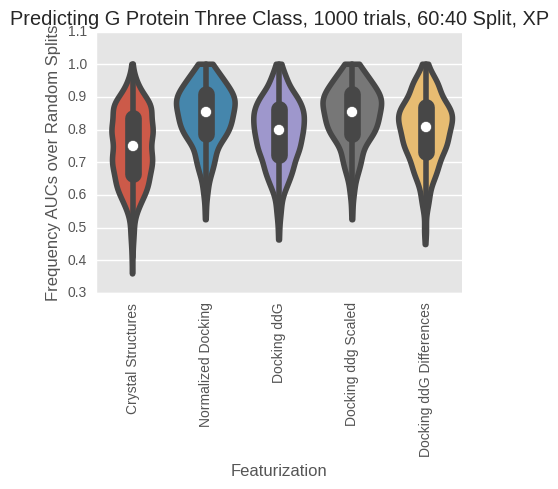

             importance
cluster11      0.084341
cluster0       0.052463
cluster4       0.044313
cluster22      0.035843
cluster7       0.034565
cluster15      0.028350
cluster23      0.027793
cluster18      0.026075
cluster8       0.025579
cluster13      0.023870
cluster12      0.019698
cluster17      0.011084
cluster1       0.002233
cluster19     -0.006843
cluster20     -0.007377
cluster3      -0.007749
cluster5      -0.010059
2rh1_grid     -0.016376
null_scores   -0.023976
cluster21     -0.026313
cluster14     -0.028314
cluster2      -0.029181
3p0g_grid     -0.036431
cluster9      -0.036652
cluster6      -0.040986
cluster10     -0.051842
cluster16     -0.052805
cluster24     -0.067394
Computing regularization path ...


ValueError: Shape of passed values is (84, 50), indices imply (28, 50)

In [174]:
results_dict = gprot_results_t1000_multi_0pt6_logistic
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
importances_df, results_df = analyze_classification_experiment(results_dict["test_roc_aucs"],
                                               results_dict["feature_importances"],
                                               feature_names,
                                               X_scaled, y, pd.concat([ddg_scaled, null_features.transpose()], axis=0),
                                               top_clusters.tolist() + null_features.columns.values.tolist(), 
                                               common_agonists, 
                                                "Predicting G Protein Three Class, 1000 trials, 60:40 Split, XP", analysis_dir)

In [149]:
feature_names

['Crystal Structures',
 'Normalized Docking',
 'Docking ddG',
 'Docking ddg Scaled',
 'Docking ddG Differences']

In [ ]:
importances_df, results_df = analyze_experiment(test_aucs, test_log_aucs, feature_importances, feature_names,
                        X_scaled, y, pd.concat([ddg_scaled, null_features.transpose()], axis=0) , top_clusters.tolist() + null_features.columns.values.tolist(), common_agonists, "Predicting Arrestin, w Crystal Features, 0.2, SP", analysis_dir)

In [ ]:
importances_df, results_df = analyze_regression_experiment(test_r2s, rfr_feature_importances, feature_names,
                        X, y, pd.concat([delta_delta_g, null_features.transpose()], axis=0) , top_clusters.tolist() + null_features.columns.values.tolist(), common_agonists, "Predicting Arrestin, RFR, w Crystal Features, SP", analysis_dir)

In [ ]:
def get_top_measurable_features(samples_normalized_features_avg_df, cluster_name):
    import re
    top_features_cluster = []
    #top_features_cluster = samples_normalized_features_avg_df.loc["cluster_name"].loc[samples_normalized_features_avg_df.loc["cluster_name"].abs() > .75].index.values
    #print(top_features_cluster)
    #print(len(top_features_cluster))
    [top_features_cluster.append(pair) for pair in samples_normalized_features_avg_df.loc[cluster_name].abs().sort(inplace=False, ascending=False).index.values[:10]]
    all_features = []
    features = []
    for f in top_features_cluster:
        fs = f.split(",")
        for i in range(0, len(fs)):
            res = int(re.findall(r'\d+', fs[i])[0])
            all_features.append(res)
            if "TRP" in fs[i] or "CYS" in fs[i] or "TYR" in fs[i] or "LYS" in fs[i]:
                features.append(res)
            
    top_features_cluster = sorted(list(set(features)))
    #print(sorted(list(set([int(re.findall(r'\d+', r)[0]) for r in all_features]))))
    #print(top_features_cluster)
    return top_features_cluster, all_features
a, b = get_top_measurable_features(samples_normalized_features_averages_df, 6)

In [ ]:
print(b)

In [ ]:
ddg_scaled[["norepinephrine", "r_epinephrine", "ethylnorepinephrine", "nebivolol", "s-carvedilol", "s-carazolol"]]

In [ ]:
print(np.mean(test_aucs, axis=0))
print(np.median(test_aucs, axis=0))
print(np.mean(test_log_aucs, axis=0))
print(np.median(test_log_aucs, axis=0))



In [ ]:
plt.scatter(ddg_scaled.loc["cluster2"][common_agonists], y)

In [ ]:
y_ori = bret["B2AR-Gprotein, Mean"].loc[common_agonists].values.reshape((-1,1))
y = binarize(y_ori, threshold=0.05)

X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
C = null_features.loc[common_agonists].values
D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T

X_train = D_scaled
y_train = y
f = np.zeros(X_train.shape[1])

rfr = RandomForestClassifier(n_estimators=1000, max_features='sqrt', n_jobs=-1, oob_score=True)
rfr.fit(X_train, y_train)

#top_indices = np.argsort(rfr.feature_importances_*-1.)[:min(20, X_train.shape[1])]
#rfr = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score=True)
#X_train = X_train[:, top_indices]
#rfr.fit(X_train, y_train)
#f[top_indices] = rfr.feature_importances_
#y_pred = rfr.predict(X_train)
#y_score = rfr.predict_proba(X_train)
top_indices=range(0,100)

In [ ]:
top_indices

In [ ]:
X_scaled.shape

In [ ]:
#G Protein, Agonist Results
test_drugs = secret_compounds + ["nebivolol", "s-carvedilol", "xamoterol", "3p0g_lig", "isoetharine", "ethylnorepinephrine", "N-Cyclopentylbutanephrine", "ta-2005", "procaterol"]
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
print(X_test)
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
#ARRESTIN, Agonist Results
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
X_test.shape
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
#G Protein, Full Agonist Results
test_drugs = secret_compounds + ["nebivolol", "s-carvedilol", "xamoterol", "3p0g_lig", "isoetharine", "ethylnorepinephrine", "N-Cyclopentylbutanephrine"]
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
#ARRESTIN, Agonist Results
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
X_test.shape
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
common_agonists = total_activity.loc[total_activity > 0.2].index.values
plt.scatter(docking_normalized.loc["cluster21"][common_agonists], bret["B2AR-Gprotein, Mean"].subtract(bret["B2AR-Arrestin, Mean"])[common_agonists])

In [ ]:
len(common_ligands)

In [ ]:
#ARRESTIN, Partial Agonist Results
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
X_test.shape
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
#ARRESTIN, Full Agonist Results
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
X_test.shape
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
top_indices

In [ ]:
ddg_scaled.transpose().loc[secret_compounds]

In [ ]:
plot_clustermap(docking_normalized[secret_compounds].iloc[top_indices].transpose(), save_file="%s/mehrdad_clustermap.pdf" %(save_dir), method='average', z_score=None)



In [ ]:
np.median(test_aucs, axis=0)

In [ ]:
plt.scatter(ddg_scaled.loc["cluster11"][common_agonists], y)



In [ ]:
arrestin_top = [16, 80, 43, 21, 84, 38, 44, 6, 13, 99]
gprot_top = [44, 6, 83, 4, 76, 99, 62, 92, 39, 80]

arrestin_only = sorted(list(set(arrestin_top).difference(set(gprot_top))))
print(arrestin_only)
gprot_only = sorted(list(set(gprot_top).difference(set(arrestin_top))))
print(gprot_only)
both = sorted(list(set(arrestin_top).intersection(set(gprot_top))))
print(both)


In [ ]:
samples_pnas_tica.loc[importances_df.index.values.tolist()[:5]]

In [ ]:
importances_df

In [ ]:
import sklearn
reload(sklearn)
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import binarize
from sklearn import cross_validation

test_accuracies = []
test_aucs = []
test_log_aucs = []
C_test_aucs = []
C_test_log_aucs = []
n_trials = 10
feature_importances = []
total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
common_agonists = total_activity.loc[total_activity > 0.1].index.values

#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]
#biased_ligands += ["nebivolol", "s-carvedilol"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#non_biased_ligands += ["s-carazolol", "Ici215001", "bisoprolol", "timolol", "s-atenolol"]
#non_biased_ligands = [n for n in df.columns.values.tolist() if n not in biased_ligands and "Carvedilol" not in n]
#common_agonists = biased_ligands + non_biased_ligands
#common_agonists = common_ligands
#top_clusters = ["cluster80", "cluster62", "cluster11", "cluster21", "cluster16", "cluster43", "cluster38"]
#differences = np.zeros((len(top_clusters), len(top_clusters)))
#for i, cluster in enumerate(top_clusters):
#    for j in range(i, len(top_clusters)):
#        differences[i][j] = 

#top_clusters = importances_df.index.values
top_clusters = delta_delta_g.index.values

y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].subtract(bret["B2AR-Gprotein, Mean"].loc[common_agonists]).values.reshape((-1,1))
#y_ori = np.vstack([y_ori, np.ones(3).reshape((-1,1))])
#common_agonists = common_agonists.tolist() + biased_ligands

X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
C = null_features.loc[common_agonists].values
D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T

#y = np.array([1. for n in biased_ligands] + [0. for n in non_biased_ligands]).reshape((-1,1))
#print(y_ori)
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
#plt.hist(y_ori, bins=25)
y = binarize(y_ori, threshold=-0.2)

features = [C, X_scaled, D_scaled]
features_y = [C, X_scaled, D_scaled, y]
feature_names = ["Crystal Structures", "MSM ddG", "Docking"]

In [ ]:
xt = ddg_scaled[biased_ligands].values.T
xt_preds = []


for j in range(0,n_trials):
    print(j)
    aucs = []
    log_aucs = []
    train_test_arrays = sklearn.cross_validation.train_test_split(*features_y, train_size=0.8, stratify=y) 
    y_train = train_test_arrays[2*len(features)]
    y_test = train_test_arrays[2*len(features) + 1]
    feature_importance = []
    
    for i in range(0, len(features)):
        X_train = train_test_arrays[2*i]
        X_test = train_test_arrays[2*i+1]

        sc = StandardScaler()
        sc.fit(X_train)
        X_train = sc.transform(X_train)
        X_test = sc.transform(X_test)

        rfr = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=3, n_jobs=-1, oob_score=True)
        rfr.fit(X_train, y_train)
        #top_indices = np.argsort(rfr.feature_importances_*-1.)[:min(10, X.shape[1])]
        feature_importance.append(rfr.feature_importances_)
        #rfr = RandomForestClassifier(n_estimators=10, max_features=None, n_jobs=-1, oob_score=True)
        #X_train = X_train[:, top_indices]
        #X_test = X_test[:, top_indices]
        #rfr.fit(X_train, y_train)
        #f = np.zeros(X.shape[1])
        #f[top_indices] = rfr.feature_importances_
        #feature_importance.append(f)
        
        if i == 1:
            xt_preds.append(rfr.predict(xt))
        
        y_pred = rfr.predict(X_test)
        y_score = rfr.predict_proba(X_test)
        auc, logauc = compute_auc(y_test, y_score)
        aucs.append(auc)
        log_aucs.append(logauc)  
    feature_importances.append(feature_importance)
    test_aucs.append(aucs)
    test_log_aucs.append(log_aucs)

In [ ]:
biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]

non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]

ddg_scaled.loc[importances_df.index.values[:5]][biased_ligands + non_biased_ligands]

In [ ]:
ddg_scaled.sort("procaterol", inplace=False).iloc[:10]

In [ ]:
plt.scatter(ddg_scaled.loc["cluster36"][common_agonists], y)

In [ ]:
y

In [ ]:
import sklearn
reload(sklearn)
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import binarize
from sklearn import cross_validation

test_accuracies = []
test_aucs = []
test_log_aucs = []
C_test_aucs = []
C_test_log_aucs = []
n_trials = 1000
feature_importances = []
reg = []
total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
common_agonists = total_activity.loc[total_activity > 0.3].index.values

#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine", "3p0g_lig"]
#biased_ligands = ["nebivolol", "s-carvedilol"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#non_biased_ligands = ["s-carazolol", "Ici215001", "bisoprolol", "timolol", "s-atenolol"]
#non_biased_ligands = [n for n in df.columns.values.tolist() if n not in biased_ligands and "Carvedilol" not in n]
#common_agonists = biased_ligands + non_biased_ligands

X = delta_delta_g[common_agonists].values.T
X_scaled = ddg_scaled[common_agonists].values.T
C = null_features.loc[common_agonists].values

#y = np.array([1. for n in biased_ligands] + [0. for n in non_biased_ligands]).reshape((-1,1))
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_ligands].divide(bret["B2AR-Arrestin, Mean"].loc[common_agonists].add(bret["B2AR-Gprotein, Mean"].loc[common_agonists])).values.reshape((-1,1))
y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
plt.hist(y_ori, bins=25)
y = binarize(y_ori, threshold=0.2) 

features = [C, X, X_scaled, docking_normalized[common_agonists].values.T]
features_y = [C, X, X_scaled, docking_normalized[common_agonists].values.T, y]
feature_names = ["Crystal Structures", "MSM States", "Normalized MSM States", "Normalized Docking"]
  

for j in range(0,n_trials):
    print(j)
    aucs = []
    log_aucs = []
    train_test_arrays = sklearn.cross_validation.train_test_split(*features_y, train_size=0.8, stratify=y) 
    y_train = train_test_arrays[2*len(features)]
    y_test = train_test_arrays[2*len(features) + 1]
    feature_importance = []
    r = []
    
    for i in range(0, len(features)):
        X_train = train_test_arrays[2*i]
        X_test = train_test_arrays[2*i+1]

        sc = StandardScaler()
        sc.fit(X_train)
        X_train = sc.transform(X_train)
        X_test = sc.transform(X_test)
        
        cs = np.logspace(-3., 20.)
        rfr = LogisticRegressionCV(Cs=cs, penalty='l2')
        rfr.fit(X_train, y_train)
        feature_importance.append(rfr.coef_)
        y_pred = rfr.predict(X_test)
        y_score = rfr.predict_proba(X_test)
        auc, logauc = compute_auc(y_test, y_score)
        aucs.append(auc)
        log_aucs.append(logauc)  
        r.append(rfr.C_)
    reg.append(r)
    feature_importances.append(feature_importance)
    test_aucs.append(aucs)
    test_log_aucs.append(log_aucs)

In [ ]:
plt.scatter(docking_normalized.loc["cluster80"][common_ligands], -1.0*bret.loc[common_ligands]["B2AR-Gprotein, Mean"].subtract(bret.loc[common_ligands]["B2AR-Arrestin, Mean"]))

In [ ]:
auc_df = pd.DataFrame(np.array(test_aucs), columns=feature_names)
auc_df.plot(kind='box')

In [ ]:
auc_df.median(axis=0)

In [ ]:
normalized_docking_importances = [f[1] for f in feature_importances]

In [ ]:
importances_df = make_importances_df(normalized_docking_importances, top_clusters)
importances_df


In [ ]:
from sklearn.preprocessing import binarize
X = ddg_scaled[common_ligands].values.T
y = bret["B2AR-Gprotein, Mean"].loc[common_ligands].values.reshape((-1,1))
y = binarize(y, threshold=0.5)
print(np.shape(y))
from sklearn.svm import l1_min_c
from sklearn import linear_model

#cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3)
cs = np.logspace(-3., 20.)
print("Computing regularization path ...")
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = pd.DataFrame(np.array(coefs_), columns=ddg_scaled.index.values, index=np.log10(cs))
#coefs_[list(set(inactive_clusters.tolist()).intersection(set(importances_df.iloc[10:20].index.values.tolist())))].plot()
coefs_[importances_df.index.values[:5]].plot()
#plt.plot(np.log10(cs), coefs_)
#ymin, ymax = plt.ylim()
###plt.xlabel('log(C)')
#plt.ylabel('Coefficients')
##plt.title('Logistic Regression Path')
#plt.axis('tight')
#plt.show()

In [ ]:
samples_pnas_tica.loc[importances_df.index.values[:10]]

In [ ]:
plt.scatter(deltas_tica.loc[importances_df.index.values[:10]]["tIC.6"], coefs_[importances_df.index.values[:10]].values[49])

In [ ]:
plot_clustermap(ddg_scaled[common_agonists.tolist()].loc[importances_df.index.values.tolist()[:5]].transpose(), save_file="%s/msm_n-clusters%d_lag-time%d_tICs%d.pdf" %(tica_dir, n_clusters, msm_lag_time, n_components), method='average')



In [ ]:
samples_pnas_tica.loc[samples_pnas_tica["tm6_tm3_dist"] < 18.0].loc[importances_df.iloc[0:5].index].dropna()

In [ ]:
ddg_scaled["nebivolol"].subtract(ddg_scaled["s-carazolol"]).sort(inplace=False).iloc[:10]

In [ ]:
ddg_scaled["s-carvedilol"].subtract(ddg_scaled["s-carazolol"]).sort(inplace=False).iloc[:10]

In [ ]:
samples_pnas_tica.loc[["cluster74", "cluster69", "cluster13", "cluster12", "cluster66"]]

In [ ]:
import plots
reload(plots)
from plots import *
#plot_importances_barh(importances_df.values, importances_df.index.values, "MSM State Importance in Arrestin Prediction", "Feature Importance", "MSM State", "%s/arrestin_0pt5_classification_rfr.pdf" %(tica_dir), n_features=50)
importances_df.iloc[0:25].plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("MSM State")
plt.title("Importance of MSM States in Predicting Arrestin Activity")
plt.savefig("%s/msm_%dstates_arrestin_0pt2_agonists_only_classification_rfr.pdf" %(tica_dir, n_clusters))
#plt.clf()


In [ ]:
X = docking_normalized[common_agonists].values.T
y = bret["B2AR-Arrestin, Mean"].subtract(bret["B2AR-Gprotein, Mean"]).loc[common_agonists].values.reshape((-1,1))
y = binarize(y, threshold=-0.2)
print(y)
from sklearn import linear_model

cs = np.logspace(-3., 200.)
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = pd.DataFrame(np.array(coefs_), columns=ddg_scaled.index.values, index=np.log10(cs))
coefs_[importances_df.iloc[0:10].loc[samples_pnas_tica["tm6_tm3_dist"] < 9.].index].plot()
plt.xlabel("Log Regularization Parameter")
plt.ylabel("Coefficient for Arrestin Activity")
plt.title("Logistic Regression Coefficient in Predicting Arrestin Activity")
plt.savefig("%s/msm_%dstates_arrestin_0pt2_agonists_only_classification_logistic.pdf" %(tica_dir, n_clusters))
#plt.clf()

In [ ]:
np.shape(coefs_)

In [ ]:
print(np.median(np.nan_to_num(test_aucs)))
print(np.median(np.nan_to_num(C_test_aucs)))
print(np.median(np.nan_to_num(test_log_aucs)))
print(np.median(np.nan_to_num(C_test_log_aucs)))

In [ ]:
lr = LinearRegression()
states = importances_df.index.values.tolist()
model = lr.fit(X, y_ori)
pd.DataFrame(model.coef_.T, index=delta_delta_g.index, columns=["importance"]).loc[states]#.sort("importance", inplace=False)

In [ ]:
model.coef_.shape

In [ ]:
import seaborn
reload(seaborn)
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(5, 5))
sns.set_style("darkgrid")
g = (auc_df
    .pipe((sns.boxplot, 'data'), orient='v', showfliers=True))
g.set_xticklabels(auc_df.columns.values, rotation=90)
sns.despine()
plt.title("AUC for Arrestin Prediction")
plt.ylabel("Frequency AUCs over Random Splits")
plt.xlabel("Featurization")
plt.show()
plt.savefig("%s/auc_arrestin_prediction_all_ligands_0pt2_cutoff.pdf" %tica_dir)

In [ ]:
corr_matrix = compute_pearson_matrix(delta_delta_g[common_agonists].values.T, y)
corr_df = pd.DataFrame(model.coef_.T, index=delta_delta_g.index.values, columns=["Correlation"]).sort("Correlation",inplace=False)
#corr_df.loc[["cluster80", "cluster16", "cluster43", "cluster44"]].plot(kind='barh')
corr_df.loc[importances_df.index.values[:20]].sort("Correlation", inplace=False).plot(kind='barh')#, figsize=(5,20))
plt.xlabel("Pearsson Correlation with Arrestin Activity")
plt.ylabel("MSM State")
plt.title("Correlation of MSM States with Arrestin Activity")


In [ ]:
samples_pnas_tica.loc[corr_df.loc[importances_df.index.values[:20]].sort("Correlation", inplace=False).index.values]

In [ ]:
df = copy.deepcopy(aggregate_docking_msm)
df[df.columns.values] = scale(df.values)
plt.scatter(df[common_ligands].loc["cluster13"].values, bret["B2AR-Arrestin, Mean"].loc[common_ligands].values.T)

In [ ]:
bret

In [ ]:
import sklearn
reload(sklearn)
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import binarize
from sklearn import cross_validation

test_accuracies = []
test_aucs = []
test_log_aucs = []
C_test_aucs = []
C_test_log_aucs = []
n_trials = 100
feature_importances = []

for j in range(0,n_trials):
    print(j)

    X = delta_delta_g[common_ligands].values.T
    C = null_features.loc[common_ligands].values
    y = bret["B2AR-Arrestin, Mean"].loc[common_ligands].values.reshape((-1,1))
    y = binarize(y, threshold=0.5)

    X_train, X_test, y_train, y_test, C_train, C_test = sklearn.cross_validation.train_test_split(X, y, C, train_size=0.8, stratify=y)
    
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)

    sc = StandardScaler()
    sc.fit(C_train)
    C_train = sc.transform(C_train)
    C_test = sc.transform(C_test)
 
    rfr = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=2, n_jobs=-1, oob_score=True)
    rfr.fit(X_train, y_train)
    feature_importances.append(rfr.feature_importances_)
    y_pred = rfr.predict(X_test)
    test_accuracies.append(np.sqrt(np.mean(np.square(y_test-y_pred.reshape((-1,1))))))
    y_score = rfr.predict_proba(X_test)
    auc, logauc = compute_auc(y_test, y_score)
    test_aucs.append(auc)
    test_log_aucs.append(logauc)
    
    rfr = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=2, n_jobs=-1, oob_score=True)
    rfr.fit(C_train, y_train)
    C_y_pred = rfr.predict(C_test)
    y_score = rfr.predict_proba(C_test)
    auc, logauc = compute_auc(y_test, y_score)
    C_test_aucs.append(auc)
    C_test_log_aucs.append(logauc)

    
    

    

In [ ]:
import seaborn
reload(seaborn)
import seaborn as sns
auc_df = pd.DataFrame(np.vstack([test_aucs, C_test_aucs]).T, columns=["MSM States", "Crystal Structures"])

plt.style.use('ggplot')
plt.figure(figsize=(5, 5))
sns.set_style("darkgrid")
g = (auc_df
    .pipe((sns.boxplot, 'data'), orient='v', showfliers=True))
#g.set_xticklabels(experiments.columns.values, rotation=90)
sns.despine()
plt.title("AUC for G Protein Prediction")
plt.ylabel("Frequency AUCs over Random Splits")
plt.xlabel("Featurization")
plt.show()
plt.savefig("%s/msm_n-states%d_auc_gprot_prediction_cutoff0pt5.pdf" %(tica_dir, n_clusters))

In [ ]:
importances_df = make_importances_df(feature_importances, delta_delta_g.index.values.tolist())
importances_df



In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression, Lasso
model = Lasso(alpha=0.0001)                                
model.fit(ddg_scaled[common_agonists].values.T, bret.loc[common_agonists]["B2AR-Arrestin, Mean"].subtract(bret.loc[common_agonists]["B2AR-Gprotein, Mean"].values))
pd.DataFrame(model.coef_, index=ddg_scaled.index, columns=["importance"]).sort("importance", inplace=False)

In [ ]:
print(np.median(np.nan_to_num(test_aucs)))
print(np.median(np.nan_to_num(C_test_aucs)))
print(np.median(np.nan_to_num(test_log_aucs)))
print(np.median(np.nan_to_num(C_test_log_aucs)))

In [ ]:
import plots
reload(plots)
from plots import *
#plot_importances_barh(importances_df.values, importances_df.index.values, "MSM State Importance in Arrestin Prediction", "Feature Importance", "MSM State", "%s/arrestin_0pt5_classification_rfr.pdf" %(tica_dir), n_features=50)
importances_df.iloc[0:25].plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("MSM State")
plt.title("Importance of MSM States in Predicting G Protein Activity")
#plt.savefig("%s/msm_%dstates_gprot_0pt5_classification_rfr.pdf" %(tica_dir, n_clusters))
#plt.clf()



In [ ]:
corr_matrix = compute_pearson_matrix(ddg_scaled[common_ligands].values.T, y)
corr_df = pd.DataFrame(model.coef_, index=ddg_scaled.index.values, columns=["Correlation"])
corr_df.loc[importances_df.index.values[:10]].sort("Correlation", inplace=False).plot(kind='barh')
plt.xlabel("Pearsson Correlation with G Protein Activity")
plt.ylabel("MSM State")
plt.title("Correlation of MSM States with G Protein Activity")
#plt.savefig("%s/msm_%dstates_gprot_0pt5_classification_correlations.pdf" %(tica_dir, n_clusters))
#plt.clf()




In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)